This notebook uses the PySlowFast repository.

https://github.com/facebookresearch/SlowFast/blob/master/INSTALL.md

# Instalation

In [ ]:
# !pip install torch==1.3.0
# !pip install torchvision==0.4.1

In [1]:
%cd /content/

/content


In [2]:
!pip install 'git+https://github.com/facebookresearch/fvcore'
!pip install simplejson
!pip install av
!pip install psutil
!pip install opencv-python
!pip install tensorboard
!pip install moviepy

  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-ui8s894z
  Running command git clone -q https://github.com/facebookresearch/fvcore /tmp/pip-req-build-ui8s894z
     |████████████████████████████████| 645kB 27.4MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3-cp37-none-any.whl size=62870 sha256=77774510644d080d6e0244c6bd2f5bea5c7559ed2113750490932dca353004c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-08r50bgf/wheels/04/a4/85/e50340018c00ae6e07e891fed78895891da33700e90a68aa05
  Created wheel for iopath: filename=iopath-0.1.4-cp37-none-any.whl size=15571 sha256=46471483ccf280da516a230cfd061b6e287a6be9dd9b02bcb25a952652027a9e
  Stored in directory: /root/.cache/pip/wheels/54/3b/fb/25b60ef5989e3f5fd76fdc575c922e6e59066ddbd1b44756a9
Successfully built fvcore iopath
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 133kB 18.9MB/s 
     |████████████

In [3]:
!pip install -U cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Requirement already up-to-date: cython in /usr/local/lib/python3.7/dist-packages (0.29.22)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-w0ns3h71
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-w0ns3h71
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-i8wz0nda
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-i8wz0nda
  Created wheel for fvcore: filename=fvcore-0.1.3-cp37-none-any.whl size=62870 sha256=cbf8550cd885baafeefc04aaef29a853365c90748cb2ea9db4e87145ead45c24
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ayej_30/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263924 sha256=25778f4b9aa48ba6779f5d951d588f2620d9db48b55850d642584ee595a2009a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ayej_30/wheels/90/51/41/646daf4

In [4]:
%cd /content/
#!git clone https://github.com/facebookresearch/slowfast
!git clone https://github.com/gabrielsluz/SlowFast.git
!export PYTHONPATH=/content/SlowFast:$PYTHONPATH

/content
Cloning into 'SlowFast'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 2191 (delta 215), reused 172 (delta 103), pack-reused 1899
Receiving objects: 100% (2191/2191), 30.46 MiB | 42.44 MiB/s, done.
Resolving deltas: 100% (1569/1569), done.


In [5]:
%cd /content/SlowFast
!python setup.py build develop

/content/SlowFast
running build
running build_py
creating build
creating build/lib
creating build/lib/slowfast
copying slowfast/__init__.py -> build/lib/slowfast
creating build/lib/slowfast/visualization
copying slowfast/visualization/gradcam_utils.py -> build/lib/slowfast/visualization
copying slowfast/visualization/video_visualizer.py -> build/lib/slowfast/visualization
copying slowfast/visualization/prediction_vis.py -> build/lib/slowfast/visualization
copying slowfast/visualization/demo_loader.py -> build/lib/slowfast/visualization
copying slowfast/visualization/utils.py -> build/lib/slowfast/visualization
copying slowfast/visualization/tensorboard_vis.py -> build/lib/slowfast/visualization
copying slowfast/visualization/predictor.py -> build/lib/slowfast/visualization
copying slowfast/visualization/async_predictor.py -> build/lib/slowfast/visualization
copying slowfast/visualization/ava_demo_precomputed_boxes.py -> build/lib/slowfast/visualization
copying slowfast/visualization/__

# Dataset test installation
## Kinetics


In [ ]:
#Download csv files
%cd /content/
!wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics400.tar.gz
!tar -zxvf kinetics400.tar.gz
!mkdir /content/kinetics

/content
--2021-02-06 20:39:27--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics400.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.13.240, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10792973 (10M) [application/octet-stream]
Saving to: ‘kinetics400.tar.gz’

kinetics400.tar.gz  100%[===================>]  10.29M  --.-KB/s    in 0.1s    

2021-02-06 20:39:28 (74.6 MB/s) - ‘kinetics400.tar.gz’ saved [10792973/10792973]

kinetics400/
kinetics400/validate.json
kinetics400/validate.csv
kinetics400/train.json
kinetics400/train.csv
kinetics400/test.json
kinetics400/test.csv


In [ ]:
#Picks the first num_lines lines in the csv file.
#Replaces spaces with underlines
%cd /content/
def extract_header(filename, num_lines):
  out_f = open(filename[:-4] + "head.csv" , "w")
  f = open(filename, "r")
  i = 0
  for line in f:
    if i == num_lines:
      break
    i += 1

    out_f.write(line.replace(" ", "_"))

  out_f.close()
  f.close()

extract_header("kinetics400/train.csv", 20)
extract_header("kinetics400/test.csv", 3)
extract_header("kinetics400/validate.csv", 10)

/content


From https://github.com/piaxar/kinetics-downloader

In [ ]:
%cd /content/
#!git clone https://github.com/piaxar/kinetics-downloader.git
!git clone https://github.com/gabrielsluz/kinetics-downloader.git
%cd kinetics-downloader
!pip install -r requirements.txt

/content
Cloning into 'kinetics-downloader'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (26/26), done.
/content/kinetics-downloader
     |████████████████████████████████| 51kB 7.2MB/s 


In [ ]:
#Download videos
%cd /content/kinetics-downloader
!python download.py /content/kinetics400/trainhead.csv /content/kinetics --trim
!python download.py /content/kinetics400/validatehead.csv /content/kinetics --trim
!python download.py /content/kinetics400/testhead.csv /content/kinetics --trim

/content/kinetics-downloader
Start downloading:  ---QUuC4vJs
Finish downloading:  ---QUuC4vJs
Start trimming:  ---QUuC4vJs
Finish trimming:  ---QUuC4vJs
Processed 1 out of 19
Start downloading:  --3ouPhoy2A
Finish downloading:  --3ouPhoy2A
Start trimming:  --3ouPhoy2A
Finish trimming:  --3ouPhoy2A
Processed 2 out of 19
Start downloading:  --4-0ihtnBU
Finish downloading:  --4-0ihtnBU
Start trimming:  --4-0ihtnBU
Finish trimming:  --4-0ihtnBU
Processed 3 out of 19
Start downloading:  --56QUhyDQM
Finish downloading:  --56QUhyDQM
Start trimming:  --56QUhyDQM
Finish trimming:  --56QUhyDQM
Processed 4 out of 19
Start downloading:  --6q_33gNew
Finish downloading:  --6q_33gNew
Start trimming:  --6q_33gNew
Finish trimming:  --6q_33gNew
Processed 5 out of 19
Start downloading:  --EaS9P7ZdQ
Finish downloading:  --EaS9P7ZdQ
Start trimming:  --EaS9P7ZdQ
Finish trimming:  --EaS9P7ZdQ
Processed 6 out of 19
Start downloading:  --IPbe5ZMCI
Finish downloading:  --IPbe5ZMCI
Start trimming:  --IPbe5ZMCI
F

The videos must be modified to be used with the SlowFast codebase.

https://github.com/facebookresearch/SlowFast/blob/master/slowfast/datasets/DATASET.md

https://github.com/facebookresearch/video-nonlocal-net/blob/master/process_data/kinetics/downscale_video_joblib.py

Video modification command:

ffmpeg  -loglevel panic -i /content/kinetics/testifying/---QUuC4vJs_84_10.mp4 -filter:v scale="trunc(oh*a/2)*2:256" -q:v 1 -c:a copy movie_256p.mp4

CSV file:

path_to_video_1 label_1

path_to_video_2 label_2

path_to_video_3 label_3

...

path_to_video_N label_N

The labels with spaces will be replaced by underlines

In [ ]:
import subprocess
import os

#Modified from: https://github.com/facebookresearch/video-nonlocal-net/blob/master/process_data/kinetics/downscale_video_joblib.py
def downscale_clip(video_path):
  status = False
  inname = '"' + video_path + '"'
  outname = '"'+ video_path[:-4] + 'out.mp4"'
  command = "ffmpeg  -loglevel panic -i {} -filter:v scale=\"trunc(oh*a/2)*2:256\" -q:v 1 -c:a copy {}".format( inname, outname)
  try:
    print("Starting -- " + video_path)
    output = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    output = subprocess.check_output("mv {} {}".format(outname, inname), shell=True, stderr=subprocess.STDOUT)
    print("Done -- " + video_path)
  except subprocess.CalledProcessError as err:
    print("Erro --" + str(err))
    return status, err.output

  status = True
  return status, 'Downscaled'

#SlowFast requires the labels to be integeres. Therefore, we need to store the labels and the integers
#Generates a dictionary of label to int
#Input => List of files in the Kinetics format
#It returns a dictionary containing and writes on a file
def gen_label_file(file_list, output_file):
  label_dict = {}
  cnt = 0
  for file_path in file_list:
    f = open(file_path, "r")
    for line in f:
      line_split = line.split(',')
      if line_split[0] == 'label':
        continue
      label = line_split[0]
      if not label in label_dict:
        label_dict[label] = str(cnt)
        cnt += 1
    f.close()

  output_file = open(output_file, "w")
  for key in label_dict.keys():
    output_file.write(key + " " + label_dict[key] + "\n")
  output_file.close()
  return label_dict

#Modifies the videos and generates the csv files from the old ones
def prepare_dataset(dataset_path, csv_file, out_file, label_dict):
  input_file = open(csv_file, "r")
  output_file = open(out_file, "w")
  for line in input_file:
    line_split = line.split(',')
    if line_split[0] == 'label':
      continue
    label = line_split[0]
    video_id = line_split[1]
    start_time = line_split[2]
    duration = str(int(line_split[3]) - int(start_time))

    video_path = dataset_path + "/" + label + "/" + video_id + "_"+start_time+"_"+duration+".mp4"
    label_sf = label.replace(' ', '_')

    downscaled, log = downscale_clip(video_path)
    if downscaled == True:
      output_file.write(video_path + " " + label_dict[label_sf] +'\n')
    
  input_file.close()
  output_file.close()

In [ ]:
file_list = ['/content/kinetics400/trainhead.csv', '/content/kinetics400/validatehead.csv', '/content/kinetics400/testhead.csv']
label_dict = gen_label_file(file_list, '/content/kinetics/labels.csv')
prepare_dataset('/content/kinetics', '/content/kinetics400/trainhead.csv', '/content/kinetics/train.csv', label_dict)
prepare_dataset('/content/kinetics', '/content/kinetics400/validatehead.csv', '/content/kinetics/val.csv', label_dict)
prepare_dataset('/content/kinetics', '/content/kinetics400/testhead.csv', '/content/kinetics/test.csv', label_dict)

Starting -- /content/kinetics/testifying/---QUuC4vJs_84_10.mp4
Done -- /content/kinetics/testifying/---QUuC4vJs_84_10.mp4
Starting -- /content/kinetics/eating_spaghetti/--3ouPhoy2A_20_10.mp4
Done -- /content/kinetics/eating_spaghetti/--3ouPhoy2A_20_10.mp4
Starting -- /content/kinetics/dribbling_basketball/--4-0ihtnBU_58_10.mp4
Done -- /content/kinetics/dribbling_basketball/--4-0ihtnBU_58_10.mp4
Starting -- /content/kinetics/playing_tennis/--56QUhyDQM_185_10.mp4
Done -- /content/kinetics/playing_tennis/--56QUhyDQM_185_10.mp4
Starting -- /content/kinetics/tap_dancing/--6q_33gNew_132_10.mp4
Done -- /content/kinetics/tap_dancing/--6q_33gNew_132_10.mp4
Starting -- /content/kinetics/climbing_a_rope/--EaS9P7ZdQ_13_10.mp4
Done -- /content/kinetics/climbing_a_rope/--EaS9P7ZdQ_13_10.mp4
Starting -- /content/kinetics/brushing_teeth/--IPbe5ZMCI_2_10.mp4
Done -- /content/kinetics/brushing_teeth/--IPbe5ZMCI_2_10.mp4
Starting -- /content/kinetics/balloon_blowing/--Ntf6n-j9Q_17_10.mp4
Done -- /content

In [ ]:
#!ffmpeg -i /content/kinetics/testifying/---QUuC4vJs_84_10.mp4 -vf scale=256:256 movie_360p.mp4
#!ffmpeg  -loglevel panic -i /content/kinetics/testifying/---QUuC4vJs_84_10.mp4 -filter:v scale="trunc(oh*a/2)*2:256" -q:v 1 -c:a copy movie_256p.mp4
#!ffmpeg "/content/kinetics/brushing teeth/--IPbe5ZMCI_2_10.mp4" -filter:v scale="trunc(oh*a/2)*2:256" -q:v 1 -c:a copy "/content/kinetics/brushing teeth/--IPbe5ZMCI_2_10out.mp4"

(256, 454, 3)


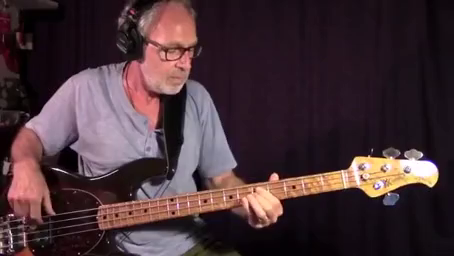

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture("/content/kinetics/playing_bass_guitar/--GF746y6UM_496_10.mp4")
ret, frame = cap.read()
print(frame.shape)
cv2_imshow(frame)

# Teste

In [ ]:
%cd /content/SlowFast
!python3 tools/run_net.py \
  --cfg configs/demo/linear.yaml \
  DATA.PATH_TO_DATA_DIR /content/kinetics/ \
  NUM_GPUS 0 \
  TRAIN.BATCH_SIZE 8

/content/SlowFast
[02/06 20:45:48][INFO] train_net.py: 377: Train with config:
[02/06 20:45:48][INFO] train_net.py: 378: {'AVA': {'ANNOTATION_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'BGR': False,
         'DETECTION_SCORE_THRESH': 0.9,
         'EXCLUSION_FILE': 'ava_val_excluded_timestamps_v2.2.csv',
         'FRAME_DIR': '/mnt/fair-flash3-east/ava_trainval_frames.img/',
         'FRAME_LIST_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'FULL_TEST_ON_VAL': False,
         'GROUNDTRUTH_FILE': 'ava_val_v2.2.csv',
         'IMG_PROC_BACKEND': 'cv2',
         'LABEL_MAP_FILE': 'ava_action_list_v2.2_for_activitynet_2019.pbtxt',
         'TEST_FORCE_FLIP': False,
         'TEST_LISTS': ['val.csv'],
         'TEST_PREDICT_BOX_LISTS': ['ava_val_predicted_boxes.csv'],
         'TRAIN_GT_BOX_LISTS': ['ava_train_v2.2.csv'],
         'TRAIN_LISTS': ['train.csv'],
         'TRAIN_PCA_EIGVAL': [0.225, 0.224, 0.229],

# CLEVRER dataset

In [ ]:
%cd /content/
!mkdir clevrer

/content


In [ ]:
%cd /content/clevrer
!wget http://data.csail.mit.edu/clevrer/videos/validation/video_validation.zip
!unzip video_validation.zip -d video_val
!rm video_validation.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: video_val/video_10000-11000/video_10896.mp4  
  inflating: video_val/video_10000-11000/video_10343.mp4  
  inflating: video_val/video_10000-11000/video_10085.mp4  
  inflating: video_val/video_10000-11000/video_10722.mp4  
  inflating: video_val/video_10000-11000/video_10267.mp4  
  inflating: video_val/video_10000-11000/video_10606.mp4  
  inflating: video_val/video_10000-11000/video_10170.mp4  
  inflating: video_val/video_10000-11000/video_10963.mp4  
  inflating: video_val/video_10000-11000/video_10511.mp4  
  inflating: video_val/video_10000-11000/video_10028.mp4  
  inflating: video_val/video_10000-11000/video_10449.mp4  
  inflating: video_val/video_10000-11000/video_10498.mp4  
  inflating: video_val/video_10000-11000/video_10260.mp4  
  inflating: video_val/video_10000-11000/video_10601.mp4  
  inflating: video_val/video_10000-11000/video_10177.mp4  
  inflating: video_val/video_10000-11000/video_10516.mp4

In [ ]:
%cd /content/clevrer
!wget http://data.csail.mit.edu/clevrer/questions/validation.json
!mv validation.json val.json
!wget http://data.csail.mit.edu/clevrer/questions/train.json
!wget http://data.csail.mit.edu/clevrer/questions/test.json

/content/clevrer
--2021-02-06 20:59:32--  http://data.csail.mit.edu/clevrer/questions/validation.json
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43327533 (41M) [application/json]
Saving to: ‘validation.json’

validation.json     100%[===================>]  41.32M  22.4MB/s    in 1.8s    

2021-02-06 20:59:34 (22.4 MB/s) - ‘validation.json’ saved [43327533/43327533]

--2021-02-06 20:59:34--  http://data.csail.mit.edu/clevrer/questions/train.json
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86651938 (83M) [application/json]
Saving to: ‘train.json’

train.json          100%[===================>]  82.64M  30.2MB/s    in 2.7s    

2021-02-06 20:59:37 (30.2 MB/s) - ‘tra

In [ ]:
%cd /content/clevrer
!wget http://data.csail.mit.edu/clevrer/videos/train/video_train.zip
!unzip -q video_train.zip -d video_train
!rm video_train.zip

/content/clevrer
--2021-02-06 21:03:02--  http://data.csail.mit.edu/clevrer/videos/train/video_train.zip
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12354893389 (12G) [application/zip]
Saving to: ‘video_train.zip’

video_train.zip     100%[===================>]  11.51G  22.4MB/s    in 9m 49s  

2021-02-06 21:12:51 (20.0 MB/s) - ‘video_train.zip’ saved [12354893389/12354893389]



# Running MONet

In [ ]:
%cd /content/SlowFast/

/content/SlowFast


In [ ]:
!python3 clevrer_dev/test_dataset.py \
  --cfg clevrer_dev/clevrer_frame.yaml \
  DATA.PATH_TO_DATA_DIR /content/clevrer \
  DATA.PATH_PREFIX /content/clevrer \
  NUM_GPUS 0 \
  TRAIN.BATCH_SIZE 3 \
  SOLVER.MAX_EPOCH 1

[02/06 22:11:39][INFO] clevrer.py:  52: Constructing Clevrer Frame train...
[02/06 22:11:42][INFO] clevrer.py: 105: Constructing Clevrer Frame dataloader (size: 10000) from /content/clevrer/train.json
10000
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
[02/06 22:11:44][WARNING] image.py: 709: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
[02/06 22:11:44][DEBUG] font_manager.py: 1246: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[02/06 22:11:44]

In [ ]:
!python3 clevrer_dev/monet/run_net.py \
  --cfg clevrer_dev/monet/monet.yaml \
  DATA.PATH_TO_DATA_DIR /content/clevrer \
  DATA.PATH_PREFIX /content/clevrer \
  NUM_GPUS 1 \
  LOG_PERIOD 10 \
  TRAIN.BATCH_SIZE 50 \
  TRAIN.EVAL_PERIOD 10 \
  TRAIN.CHECKPOINT_PERIOD 10 \
  SOLVER.MAX_EPOCH 50 \

[02/07 00:40:51][INFO] train_net.py: 289: Train with config:
[02/07 00:40:51][INFO] train_net.py: 290: {'AVA': {'ANNOTATION_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'BGR': False,
         'DETECTION_SCORE_THRESH': 0.9,
         'EXCLUSION_FILE': 'ava_val_excluded_timestamps_v2.2.csv',
         'FRAME_DIR': '/mnt/fair-flash3-east/ava_trainval_frames.img/',
         'FRAME_LIST_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'FULL_TEST_ON_VAL': False,
         'GROUNDTRUTH_FILE': 'ava_val_v2.2.csv',
         'IMG_PROC_BACKEND': 'cv2',
         'LABEL_MAP_FILE': 'ava_action_list_v2.2_for_activitynet_2019.pbtxt',
         'TEST_FORCE_FLIP': False,
         'TEST_LISTS': ['val.csv'],
         'TEST_PREDICT_BOX_LISTS': ['ava_val_predicted_boxes.csv'],
         'TRAIN_GT_BOX_LISTS': ['ava_train_v2.2.csv'],
         'TRAIN_LISTS': ['train.csv'],
         'TRAIN_PCA_EIGVAL': [0.225, 0.224, 0.229],
         'TRAIN_P

In [ ]:
!ls ./checkpoints

checkpoint_epoch_00006.pyth  checkpoint_epoch_00020.pyth
checkpoint_epoch_00010.pyth


In [ ]:
!rm ./checkpoints/*

In [ ]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/gabrielsluz/SlowFast
   4dcd973..7782274  master     -> origin/master
Updating 4dcd973..7782274
Fast-forward
 slowfast/datasets/clevrer.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
from google.colab import files
files.download('./checkpoints/checkpoint_epoch_00020.pyth') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cp ./checkpoints/checkpoint_epoch_00020.pyth /content/drive/MyDrive/checkpoint_epoch_00020.pyth

In [ ]:
!ls /content/drive/MyDrive

'Apresentação sem título.gslides'   Equipe.xlsx
 checkpoint_epoch_00020.pyth	   'POC1 - Apresentação Final.gslides'
'Colab Notebooks'		   'POC1 -Apresentação Parcial.gslides'
 Equipe.numbers


# Word Embeddings

In [6]:
%cd /content/
!wget http://nlp.stanford.edu/data/glove.6B.zip

/content
--2021-03-02 17:36:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-02 17:36:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-02 17:36:33--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

In [7]:
!unzip -q glove.6B.zip -d glove.6B
!rm glove.6B.zip

In [ ]:
#Updates vocab dict in place from a token list    
def update_vocab(vocab, token_list):
  for token in token_list:
    if token in vocab:
      continue
    else:
      vocab[token] = vocab[' counter ']
      vocab[' counter '] += 1
ans_vocab = {} #Used for descriptive questions
ans_vocab[' counter '] = 0
possible_ans = ["0", "1", "2", "3", "4", "5", 
            "yes", "no", "rubber", "metal",
            "blue", "purple", "yellow", "cyan"
]
update_vocab(ans_vocab, possible_ans)

In [ ]:
import numpy as np
def parse_glove_file(file_name, emb_dim, vocab_dict):
  """
  Opens a Glove pretrained embeddings file with embeddings with dimension emb_dim
  Builds a matrix vocab_size x emb_dim, compatible with nn.Embedding to be used with vocab_dict
  """
  word_list = []
  for word in vocab_dict.keys():
    word_list.append(word)
  emb_mat = np.zeros((len(vocab_dict), emb_dim))
  with open(file_name, 'rb') as f:
    for l in f:
      line = l.decode().split()
      word = line[0]
      if not word in vocab_dict:
        continue
      vect = np.array(line[1:]).astype(np.float)
      emb_mat[vocab_dict[word]] = vect
      word_list.remove(word)
  
  if len(word_list) > 0:
    print("Missing following words")
    print(word_list)
  return emb_mat

In [ ]:
vocab_dict = ans_vocab
emb_mat = parse_glove_file("/content/glove.6B/glove.6B.50d.txt", 50, vocab_dict)

Missing following words
[' counter ']


Testar no clevrer

In [8]:
%cd /content/
!mkdir -p clevrer
%cd /content/clevrer
!wget http://data.csail.mit.edu/clevrer/questions/train.json
!wget http://data.csail.mit.edu/clevrer/questions/validation.json

%cd /content/clevrer
!mv validation.json val.json

/content
/content/clevrer
--2021-03-02 17:44:03--  http://data.csail.mit.edu/clevrer/questions/train.json
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86651938 (83M) [application/json]
Saving to: ‘train.json’

train.json          100%[===================>]  82.64M  5.85MB/s    in 37s     

2021-03-02 17:44:41 (2.21 MB/s) - ‘train.json’ saved [86651938/86651938]

--2021-03-02 17:44:41--  http://data.csail.mit.edu/clevrer/questions/validation.json
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43327533 (41M) [application/json]
Saving to: ‘validation.json’

validation.json     100%[===================>]  41.32M  2.68MB/s    in 21s     

2021-03-02 17:45:02 (1.96 MB/s) - 

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66'] [3.8928245099691243, 3.6924752539549117, 3.6743201445310545, 3.657910045904991, 3.6631194131496625, 3.6533400309391513, 3.6511117082375746, 3.6496631717070556, 3.7322734120564585, 3.6443357987281604, 3.6409814052092724, 3.6474804320396523, 3.6243653083458924, 3.631440736544438, 3.6264103651046753, 3.6131056401974115, 3.6191963645128102, 3.6075352346285796, 3.6066693312082534, 3.58432370195022, 3.5869873953171267, 3.580638361282838, 3.5926003547815175, 3.581149698832096, 3.5724358642712617, 3.5827586948871613, 3.5730741650630264, 3.570918539395699, 3.575324297715456, 3.564173

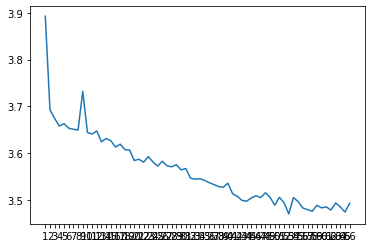

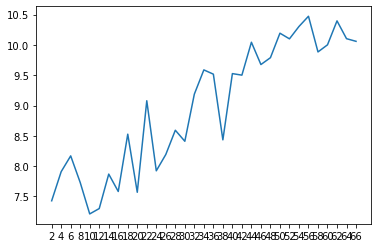

In [15]:
import matplotlib.pyplot as plt
def plot_stats(stats_file):
    #Printing epochs for now
    train_epoch = []
    train_loss = []
    val_epoch = []
    val_loss = []
    with open(stats_file, "r") as f:
        for line in f:
            d = eval(line)
            if d['_type'] == 'train_epoch':
                train_loss.append(d['loss'])
                train_epoch.append(d['epoch'].split('/')[0])
            if d['_type'] == 'val_epoch':
                val_loss.append(d['loss'])
                val_epoch.append(d['epoch'].split('/')[0])
    print("Data:")
    print("Train epoch , train loss")
    print(train_epoch, train_loss)
    print("Val epoch , val loss")
    print(val_epoch, val_loss)
    plt.plot(train_epoch, train_loss)
    plt.show()
    plt.plot(val_epoch, val_loss)
    plt.show()

#plot_stats('train_stats.txt')

In [11]:
%cd /content/SlowFast/
!git pull

/content/SlowFast
Already up to date.


In [28]:
%cd /content/SlowFast/
#!rm ./checkpoints/*
!python3 clevrer_dev/text_baseline/run_net.py \
  --cfg clevrer_dev/text_baseline/text_gru.yaml \
  DATA.PATH_TO_DATA_DIR /content/clevrer \
  DATA.PATH_PREFIX /content/clevrer \
  NUM_GPUS 1 \
  LOG_PERIOD 400 \
  TRAIN.BATCH_SIZE 32 \
  TRAIN.EVAL_PERIOD 2 \
  TRAIN.CHECKPOINT_PERIOD 50 \
  WORD_EMB.USE_PRETRAINED_EMB True \
  WORD_EMB.TRAINABLE True \
  WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
  WORD_EMB.EMB_DIM 300 \
  SOLVER.EPOCH_CYCLE 400.0 \
  SOLVER.BASE_LR 0.001 \
  SOLVER.LR_POLICY cosine \
  SOLVER.COSINE_END_LR 0.00005 \
  SOLVER.WEIGHT_DECAY 0.00001 \
  SOLVER.OPTIMIZING_METHOD adam \
  SOLVER.MAX_EPOCH 400

/content/SlowFast
[03/02 21:08:21][INFO] train_net.py: 282: Train with config:
[03/02 21:08:21][INFO] train_net.py: 283: {'AVA': {'ANNOTATION_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'BGR': False,
         'DETECTION_SCORE_THRESH': 0.9,
         'EXCLUSION_FILE': 'ava_val_excluded_timestamps_v2.2.csv',
         'FRAME_DIR': '/mnt/fair-flash3-east/ava_trainval_frames.img/',
         'FRAME_LIST_DIR': '/mnt/vol/gfsai-flash3-east/ai-group/users/haoqifan/ava/frame_list/',
         'FULL_TEST_ON_VAL': False,
         'GROUNDTRUTH_FILE': 'ava_val_v2.2.csv',
         'IMG_PROC_BACKEND': 'cv2',
         'LABEL_MAP_FILE': 'ava_action_list_v2.2_for_activitynet_2019.pbtxt',
         'TEST_FORCE_FLIP': False,
         'TEST_LISTS': ['val.csv'],
         'TEST_PREDICT_BOX_LISTS': ['ava_val_predicted_boxes.csv'],
         'TRAIN_GT_BOX_LISTS': ['ava_train_v2.2.csv'],
         'TRAIN_LISTS': ['train.csv'],
         'TRAIN_PCA_EIGVAL': [0.225, 0.224, 0.229],

## Experimentação guiada

Parâmetros iniciais:

Starting parameters:
- Network
 - MLP hidden dimension: 2048
 - LSTM hidden state: 512
 - Dropout: 0.5

- Word embeddings:
 - Embed size: 50
 - Embed provider: Glove
 - Trainable or not : Trainable

- Solver
 - Adam, rmsprop or sgd: sgd
 - Learning rate cycle: 0.001 to 0
 - Weight decay: 0.001
- Train:
 - Batch size: 64


In [ ]:

  WORD_EMB.USE_PRETRAINED_EMB False \
  WORD_EMB.TRAINABLE True \
{"RAM": "2.30/12.72G", "_type": "val_epoch", "epoch": "40/40", "gpu_mem": "0.13G", "mc_opt_err": 58.59000, "mc_q_err": 96.24000, "min_mc_opt_err": 58.26000, "min_mc_q_err": 95.90000, "min_top1_err": 88.78000, "min_top5_err": 53.24000, "time_diff": 0.12446, "top1_err": 88.78000, "top5_err": 54.56000}


  WORD_EMB.USE_PRETRAINED_EMB False \
  WORD_EMB.TRAINABLE False \
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "40/40", "gpu_mem": "0.13G", "mc_opt_err": 58.59000, "mc_q_err": 96.24000, "min_mc_opt_err": 58.26000, "min_mc_q_err": 95.90000, "min_top1_err": 88.78000, "min_top5_err": 53.24000, "time_diff": 0.15221, "top1_err": 88.78000, "top5_err": 54.56000}


WORD_EMB.USE_PRETRAINED_EMB True \
  WORD_EMB.TRAINABLE False \
{"RAM": "2.31/12.72G", "_type": "val_epoch", "epoch": "40/40", "gpu_mem": "0.13G", "mc_opt_err": 58.66500, "mc_q_err": 96.20000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 95.90000, "min_top1_err": 88.78000, "min_top5_err": 53.24000, "time_diff": 0.13591, "top1_err": 88.78000, "top5_err": 54.56000}

WORD_EMB.USE_PRETRAINED_EMB True \
  WORD_EMB.TRAINABLE True \
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "40/40", "gpu_mem": "0.13G", "mc_opt_err": 58.64500, "mc_q_err": 96.20000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 95.90000, "min_top1_err": 88.78000, "min_top5_err": 53.24000, "time_diff": 0.14404, "top1_err": 88.78000, "top5_err": 54.56000}

Linear pred head
WORD_EMB.USE_PRETRAINED_EMB False \
  WORD_EMB.TRAINABLE True \
{"RAM": "2.29/12.72G", "_type": "val_epoch", "epoch": "40/40", "gpu_mem": "0.11G", "mc_opt_err": 58.93500, "mc_q_err": 96.78000, "min_mc_opt_err": 57.96000, "min_mc_q_err": 96.08000, "min_top1_err": 89.22000, "min_top5_err": 53.18000, "time_diff": 0.13157, "top1_err": 89.72000, "top5_err": 53.86000}

#Begin to use 15 epochs instead and print loss
SOLVER.BASE_LR 0.5 \
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.12961, "dt_data": 0.12961, "dt_net": 0.01642, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.50535, "lr": 0.34579, "mc_opt_err": 58.35837, "mc_q_err": 96.60457, "top1_err": 90.45473, "top5_err": 55.78926}
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.15000, "mc_q_err": 96.36000, "min_mc_opt_err": 58.08500, "min_mc_q_err": 96.08000, "min_top1_err": 89.88000, "min_top5_err": 53.42000, "time_diff": 0.12257, "top1_err": 91.26000, "top5_err": 53.50000}

SOLVER.BASE_LR 0.1 \
{"RAM": "2.29/12.72G", "_type": "train_epoch", "dt": 0.13591, "dt_data": 0.13591, "dt_net": 0.01738, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.51203, "lr": 0.06916, "mc_opt_err": 58.64133, "mc_q_err": 96.54447, "top1_err": 90.92548, "top5_err": 55.58894}
{"RAM": "2.29/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.21000, "mc_q_err": 98.48000, "min_mc_opt_err": 51.03000, "min_mc_q_err": 92.40000, "min_top1_err": 89.38000, "min_top5_err": 53.50000, "time_diff": 0.13352, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.BASE_LR 0.1 \
SOLVER.WEIGHT_DECAY 0.0001 \
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.13609, "dt_data": 0.13609, "dt_net": 0.01844, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 1.89106, "lr": 0.06916, "mc_opt_err": 59.16466, "mc_q_err": 96.89503, "top1_err": 67.00721, "top5_err": 6.15986}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.25000, "mc_q_err": 96.68000, "min_mc_opt_err": 57.89000, "min_mc_q_err": 96.26000, "min_top1_err": 89.66000, "min_top5_err": 53.94000, "time_diff": 0.13062, "top1_err": 100.00000, "top5_err": 96.52000}

SOLVER.BASE_LR 0.01 \
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.14709, "dt_data": 0.14709, "dt_net": 0.01944, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 2.83016, "lr": 0.00692, "mc_opt_err": 58.76653, "mc_q_err": 97.21554, "top1_err": 84.09455, "top5_err": 26.34215}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.15000, "mc_q_err": 96.36000, "min_mc_opt_err": 58.02500, "min_mc_q_err": 96.02000, "min_top1_err": 88.00000, "min_top5_err": 53.42000, "time_diff": 0.13881, "top1_err": 100.00000, "top5_err": 98.86000}

SOLVER.BASE_LR 0.001 \
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.13859, "dt_data": 0.13859, "dt_net": 0.01898, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.52714, "lr": 0.00069, "mc_opt_err": 58.67388, "mc_q_err": 96.93510, "top1_err": 90.22436, "top5_err": 54.67748}
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.20500, "mc_q_err": 98.46000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 96.26000, "min_top1_err": 89.38000, "min_top5_err": 53.42000, "time_diff": 0.13148, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.BASE_LR 0.0001 \
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.14060, "dt_data": 0.14060, "dt_net": 0.01801, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.73277, "lr": 0.00007, "mc_opt_err": 58.78155, "mc_q_err": 97.07532, "top1_err": 90.22436, "top5_err": 54.67748}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.18000, "mc_q_err": 98.50000, "min_mc_opt_err": 58.39500, "min_mc_q_err": 98.04000, "min_top1_err": 88.26000, "min_top5_err": 53.42000, "time_diff": 0.13847, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.BASE_LR 0.00001 \
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.14107, "dt_data": 0.14107, "dt_net": 0.01912, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.77846, "lr": 0.00001, "mc_opt_err": 58.58123, "mc_q_err": 97.03526, "top1_err": 90.92548, "top5_err": 54.63742}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.20500, "mc_q_err": 98.48000, "min_mc_opt_err": 58.39500, "min_mc_q_err": 98.06000, "min_top1_err": 90.64000, "min_top5_err": 53.10000, "time_diff": 0.13370, "top1_err": 91.14000, "top5_err": 53.50000}

SOLVER.BASE_LR 0.00005 \
{"RAM": "2.31/12.72G", "_type": "train_epoch", "dt": 0.15002, "dt_data": 0.15002, "dt_net": 0.01887, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.75693, "lr": 0.00003, "mc_opt_err": 58.62380, "mc_q_err": 96.91506, "top1_err": 90.21434, "top5_err": 54.67748}
{"RAM": "2.31/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.20000, "mc_q_err": 98.46000, "min_mc_opt_err": 58.39500, "min_mc_q_err": 98.02000, "min_top1_err": 88.68000, "min_top5_err": 53.42000, "time_diff": 0.13929, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.BASE_LR 0.00005 \
SOLVER.MAX_EPOCH 50
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.13977, "dt_data": 0.13977, "dt_net": 0.01823, "epoch": "50/50", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.74314, "lr": 0.00001, "mc_opt_err": 58.80659, "mc_q_err": 97.38582, "top1_err": 89.88381, "top5_err": 54.66747}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "50/50", "gpu_mem": "0.13G", "mc_opt_err": 59.23500, "mc_q_err": 98.18000, "min_mc_opt_err": 58.31500, "min_mc_q_err": 98.02000, "min_top1_err": 88.68000, "min_top5_err": 53.14000, "time_diff": 0.12990, "top1_err": 90.38000, "top5_err": 54.98000}

SOLVER.WEIGHT_DECAY 0.00001 \ #Good loss function decrease
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.14708, "dt_data": 0.14708, "dt_net": 0.01836, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.52583, "lr": 0.00069, "mc_opt_err": 58.66637, "mc_q_err": 96.91506, "top1_err": 90.22436, "top5_err": 54.67748}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.21500, "mc_q_err": 98.50000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 96.26000, "min_top1_err": 89.38000, "min_top5_err": 53.42000, "time_diff": 0.13521, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.WEIGHT_DECAY 0.00001 \
SOLVER.MAX_EPOCH 50
Same as with 15 epochs

#Let's use ideas from https://www.arxiv-vanity.com/papers/1803.09820/#S4.SS1
#Agressive cyclical learning rate 
SOLVER.EPOCH_CYCLE 40.0 \
SOLVER.BASE_LR 2.0 \
SOLVER.COSINE_END_LR 0.001 \
{"RAM": "2.34/12.72G", "_type": "train_epoch", "dt": 0.14459, "dt_data": 0.14459, "dt_net": 0.01641, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.52965, "lr": 1.38346, "mc_opt_err": 58.40345, "mc_q_err": 96.73478, "top1_err": 91.27604, "top5_err": 58.03285}
{"RAM": "2.34/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.21000, "mc_q_err": 98.48000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 96.26000, "min_top1_err": 89.76000, "min_top5_err": 54.38000, "time_diff": 0.13645, "top1_err": 91.26000, "top5_err": 60.26000}

SOLVER.EPOCH_CYCLE 15.0 \
SOLVER.BASE_LR 2.0 \
SOLVER.COSINE_END_LR 0.001 \
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.14702, "dt_data": 0.14702, "dt_net": 0.01680, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.49564, "lr": 0.00100, "mc_opt_err": 58.98438, "mc_q_err": 98.01683, "top1_err": 90.49479, "top5_err": 54.67748}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.21000, "mc_q_err": 98.48000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 96.08000, "min_top1_err": 89.38000, "min_top5_err": 53.50000, "time_diff": 0.13389, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.EPOCH_CYCLE 15.0 \
SOLVER.BASE_LR 5.0 \
SOLVER.COSINE_END_LR 0.001 \
loss": 168696521898201225294249984.00000

SOLVER.EPOCH_CYCLE 15.0 \
SOLVER.BASE_LR 4.0 \
SOLVER.COSINE_END_LR 0.001 \
{"RAM": "2.34/12.72G", "_type": "train_epoch", "dt": 0.15270, "dt_data": 0.15270, "dt_net": 0.01790, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.49585, "lr": 0.00100, "mc_opt_err": 58.84415, "mc_q_err": 97.79647, "top1_err": 90.51482, "top5_err": 54.67748}
{"RAM": "2.35/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.21000, "mc_q_err": 98.48000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 96.08000, "min_top1_err": 89.38000, "min_top5_err": 53.50000, "time_diff": 0.14054, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.EPOCH_CYCLE 15.0 \
SOLVER.BASE_LR 4.0 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.14499, "dt_data": 0.14500, "dt_net": 0.01727, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.90606, "lr": 0.00100, "mc_opt_err": 58.88421, "mc_q_err": 97.86659, "top1_err": 90.02404, "top5_err": 54.60737}
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.21000, "mc_q_err": 98.48000, "min_mc_opt_err": 58.08000, "min_mc_q_err": 96.08000, "min_top1_err": 89.18000, "min_top5_err": 53.50000, "time_diff": 0.13489, "top1_err": 89.18000, "top5_err": 53.50000}


SOLVER.EPOCH_CYCLE 7.5 \
SOLVER.BASE_LR 4.0 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
{"RAM": "2.36/12.72G", "_type": "train_epoch", "dt": 0.15126, "dt_data": 0.15126, "dt_net": 0.01745, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 2529776.15578, "lr": 3.99999, "mc_opt_err": 58.67889, "mc_q_err": 96.96514, "top1_err": 91.48638, "top5_err": 60.65705}
{"RAM": "2.36/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 58.68500, "mc_q_err": 96.84000, "min_mc_opt_err": 58.08000, "min_mc_q_err": 96.06000, "min_top1_err": 89.92000, "min_top5_err": 53.26000, "time_diff": 0.13654, "top1_err": 91.34000, "top5_err": 63.06000}


SOLVER.EPOCH_CYCLE 7.5 \
SOLVER.BASE_LR 1.0 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
{"RAM": "2.34/12.72G", "_type": "train_epoch", "dt": 0.15137, "dt_data": 0.15137, "dt_net": 0.01769, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.51702, "lr": 1.00000, "mc_opt_err": 58.38341, "mc_q_err": 96.73478, "top1_err": 91.34615, "top5_err": 57.35176}
{"RAM": "2.34/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.15000, "mc_q_err": 96.36000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 96.08000, "min_top1_err": 89.76000, "min_top5_err": 53.42000, "time_diff": 0.14074, "top1_err": 91.26000, "top5_err": 60.26000}

SOLVER.EPOCH_CYCLE 7.5 \
SOLVER.BASE_LR 1.0 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
SOLVER.MAX_EPOCH 50
{"RAM": "2.35/12.72G", "_type": "train_epoch", "dt": 0.14768, "dt_data": 0.14768, "dt_net": 0.01728, "epoch": "50/50", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.51540, "lr": 0.25191, "mc_opt_err": 58.62380, "mc_q_err": 96.80489, "top1_err": 90.40465, "top5_err": 56.23998}
{"RAM": "2.35/12.72G", "_type": "val_epoch", "epoch": "50/50", "gpu_mem": "0.13G", "mc_opt_err": 58.46500, "mc_q_err": 96.60000, "min_mc_opt_err": 57.72000, "min_mc_q_err": 96.04000, "min_top1_err": 89.02000, "min_top5_err": 52.98000, "time_diff": 0.14062, "top1_err": 91.02000, "top5_err": 54.46000}

SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0009 \
SOLVER.WEIGHT_DECAY 0.0001 \
{"RAM": "2.31/12.72G", "_type": "train_epoch", "dt": 0.14922, "dt_data": 0.14922, "dt_net": 0.01771, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.52220, "lr": 0.00090, "mc_opt_err": 58.71394, "mc_q_err": 96.97516, "top1_err": 90.22436, "top5_err": 54.67748}
{"RAM": "2.31/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.13G", "mc_opt_err": 59.20500, "mc_q_err": 98.48000, "min_mc_opt_err": 57.92000, "min_mc_q_err": 96.26000, "min_top1_err": 89.38000, "min_top5_err": 53.42000, "time_diff": 0.14464, "top1_err": 89.38000, "top5_err": 53.50000}

SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0009 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
{"RAM": "2.35/12.72G", "_type": "train_epoch", "dt": 0.14763, "dt_data": 0.14763, "dt_net": 0.02346, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.16G", "loss": 3.52586, "lr": 0.00090, "mc_opt_err": 58.88672, "mc_q_err": 96.84495, "top1_err": 89.99399, "top5_err": 54.97796}
{"RAM": "2.35/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.16G", "mc_opt_err": 58.87000, "mc_q_err": 98.28000, "min_mc_opt_err": 58.08500, "min_mc_q_err": 95.84000, "min_top1_err": 89.18000, "min_top5_err": 52.88000, "time_diff": 0.14093, "top1_err": 89.64000, "top5_err": 54.56000}

SOLVER.BASE_LR 1.0 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.15082, "dt_data": 0.15082, "dt_net": 0.02184, "epoch": "15/15", "eta": "0:00:00", "gpu_mem": "0.16G", "loss": 3.49751, "lr": 0.00100, "mc_opt_err": 58.83664, "mc_q_err": 97.75641, "top1_err": 89.99399, "top5_err": 54.97796}
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "15/15", "gpu_mem": "0.16G", "mc_opt_err": 58.87000, "mc_q_err": 98.28000, "min_mc_opt_err": 57.75000, "min_mc_q_err": 95.90000, "min_top1_err": 89.18000, "min_top5_err": 52.88000, "time_diff": 0.14343, "top1_err": 89.64000, "top5_err": 54.56000}

SOLVER.BASE_LR 1.0 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.15451, "dt_data": 0.15451, "dt_net": 0.02317, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "0.16G", "loss": 3.52552, "lr": 1.00000, "mc_opt_err": 58.99690, "mc_q_err": 96.96514, "top1_err": 91.17588, "top5_err": 57.14143}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "0.16G", "mc_opt_err": 58.29000, "mc_q_err": 96.30000, "min_mc_opt_err": 57.65000, "min_mc_q_err": 96.24000, "min_top1_err": 89.64000, "min_top5_err": 54.14000, "time_diff": 0.15166, "top1_err": 89.64000, "top5_err": 56.06000}

SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0009 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.14912, "dt_data": 0.14912, "dt_net": 0.02366, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "0.16G", "loss": 3.50273, "lr": 0.00100, "mc_opt_err": 58.77404, "mc_q_err": 97.03526, "top1_err": 89.91386, "top5_err": 54.53726}
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "0.16G", "mc_opt_err": 58.67500, "mc_q_err": 96.54000, "min_mc_opt_err": 58.08500, "min_mc_q_err": 95.84000, "min_top1_err": 89.18000, "min_top5_err": 52.88000, "time_diff": 0.13979, "top1_err": 89.88000, "top5_err": 54.70000}

SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
{"RAM": "2.36/12.72G", "_type": "train_epoch", "dt": 0.14723, "dt_data": 0.14723, "dt_net": 0.02346, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "0.16G", "loss": 3.51567, "lr": 0.00100, "mc_opt_err": 58.66637, "mc_q_err": 96.76482, "top1_err": 89.91386, "top5_err": 54.53726}
{"RAM": "2.36/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "0.16G", "mc_opt_err": 58.67500, "mc_q_err": 96.54000, "min_mc_opt_err": 58.08000, "min_mc_q_err": 95.84000, "min_top1_err": 89.18000, "min_top5_err": 52.88000, "time_diff": 0.14155, "top1_err": 89.88000, "top5_err": 54.70000}

#Network structure:
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0009 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 2048
{"RAM": "2.41/12.72G", "_type": "train_epoch", "dt": 0.15084, "dt_data": 0.15084, "dt_net": 0.22729, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "0.79G", "loss": 3.48849, "lr": 0.00100, "mc_opt_err": 58.47606, "mc_q_err": 97.22556, "top1_err": 90.15425, "top5_err": 53.68590}
{"RAM": "2.41/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "0.79G", "mc_opt_err": 59.37000, "mc_q_err": 98.34000, "min_mc_opt_err": 58.05500, "min_mc_q_err": 96.16000, "min_top1_err": 89.44000, "min_top5_err": 52.76000, "time_diff": 0.14615, "top1_err": 89.90000, "top5_err": 54.28000}
#Considerably increased time => "dt_net": 0.02346 to "dt_net": 0.22258

SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
Preliminar : {"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.15382, "dt_data": 0.15382, "dt_net": 0.37984, "epoch": "2/30", "eta": "0:11:11", "gpu_mem": "1.45G", "loss": 1.93973, "lr": 0.09575, "mc_opt_err": 58.52364, "mc_q_err": 96.63462, "top1_err": 65.43470, "top5_err": 6.34014}
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "2/30", "gpu_mem": "1.45G", "mc_opt_err": 58.56500, "mc_q_err": 95.92000, "min_mc_opt_err": 58.56500, "min_mc_q_err": 95.92000, "min_top1_err": 97.44000, "min_top5_err": 93.02000, "time_diff": 0.14716, "top1_err": 97.44000, "top5_err": 93.02000}
Shows overfitting => let's try, trhough dropout and weight decay to reduce overfitting
#Even higher training time "dt_net": 0.39805

SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.15662, "dt_data": 0.15662, "dt_net": 0.37724, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "1.45G", "loss": 1.89942, "lr": 0.10000, "mc_opt_err": 59.31741, "mc_q_err": 97.60617, "top1_err": 65.43470, "top5_err": 6.70072}
{"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "1.45G", "mc_opt_err": 58.76000, "mc_q_err": 96.78000, "min_mc_opt_err": 57.95000, "min_mc_q_err": 95.92000, "min_top1_err": 91.96000, "min_top5_err": 75.04000, "time_diff": 0.17865, "top1_err": 91.96000, "top5_err": 79.02000}
#Increasing weight decay helped but didn't solve the problem. Let's increase more

SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.37/12.72G", "_type": "train_epoch", "dt": 0.13967, "dt_data": 0.13967, "dt_net": 0.36141, "epoch": "24/30", "eta": "0:02:10", "gpu_mem": "1.45G", "loss": 2.37595, "lr": 0.06573, "mc_opt_err": 58.53365, "mc_q_err": 97.04527, "top1_err": 72.01522, "top5_err": 14.30288}
{"RAM": "2.37/12.72G", "_type": "val_epoch", "epoch": "24/30", "gpu_mem": "1.45G", "mc_opt_err": 58.81000, "mc_q_err": 98.38000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 89.30000, "min_top5_err": 57.94000, "time_diff": 0.13187, "top1_err": 100.00000, "top5_err": 84.00000}
#Learning rate might be too high

SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0005 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.38/12.72G", "_type": "train_epoch", "dt": 0.15235, "dt_data": 0.15234, "dt_net": 0.35781, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "1.45G", "loss": 3.19113, "lr": 0.00100, "mc_opt_err": 58.62881, "mc_q_err": 97.03526, "top1_err": 82.90264, "top5_err": 39.74359}
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "1.45G", "mc_opt_err": 58.76000, "mc_q_err": 96.78000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.98000, "min_top1_err": 88.84000, "min_top5_err": 53.10000, "time_diff": 0.16866, "top1_err": 88.84000, "top5_err": 56.10000}

#Learning rate is probably too low, but very promising results

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.40/12.72G", "_type": "train_epoch", "dt": 0.15332, "dt_data": 0.15332, "dt_net": 0.35662, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "1.45G", "loss": 2.01118, "lr": 0.01000, "mc_opt_err": 58.88421, "mc_q_err": 97.96675, "top1_err": 66.69671, "top5_err": 7.76242}
{"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "1.45G", "mc_opt_err": 58.76000, "mc_q_err": 96.78000, "min_mc_opt_err": 57.75500, "min_mc_q_err": 95.92000, "min_top1_err": 90.66000, "min_top5_err": 53.72000, "time_diff": 0.15640, "top1_err": 98.98000, "top5_err": 79.68000}
#Learning rate is good for training (looking at 15 epochs) but val err only increases. Let's increase regularization

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.1 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.40/12.72G", "_type": "train_epoch", "dt": 0.15985, "dt_data": 0.15985, "dt_net": 0.34528, "epoch": "10/30", "eta": "0:08:18", "gpu_mem": "1.45G", "loss": 3.64202, "lr": 0.00326, "mc_opt_err": 58.22316, "mc_q_err": 97.23558, "top1_err": 89.89383, "top5_err": 54.75761}
{"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "10/30", "gpu_mem": "1.45G", "mc_opt_err": 59.08000, "mc_q_err": 98.36000, "min_mc_opt_err": 58.56500, "min_mc_q_err": 95.92000, "min_top1_err": 89.44000, "min_top5_err": 53.10000, "time_diff": 0.14301, "top1_err": 89.94000, "top5_err": 53.10000}
#Seems to be too much weight decay

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.05 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.41/12.72G", "_type": "train_epoch", "dt": 0.15603, "dt_data": 0.15603, "dt_net": 0.34974, "epoch": "10/30", "eta": "0:08:06", "gpu_mem": "1.45G", "loss": 3.55676, "lr": 0.00326, "mc_opt_err": 58.30829, "mc_q_err": 98.16707, "top1_err": 89.89383, "top5_err": 54.75761}
{"RAM": "2.41/12.72G", "_type": "val_epoch", "epoch": "10/30", "gpu_mem": "1.45G", "mc_opt_err": 59.08000, "mc_q_err": 98.36000, "min_mc_opt_err": 58.56500, "min_mc_q_err": 95.92000, "min_top1_err": 89.44000, "min_top5_err": 53.10000, "time_diff": 0.15242, "top1_err": 89.94000, "top5_err": 53.10000}
#Still too high

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.03 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.41/12.72G", "_type": "train_epoch", "dt": 0.16048, "dt_data": 0.16048, "dt_net": 0.35505, "epoch": "10/30", "eta": "0:08:20", "gpu_mem": "1.45G", "loss": 3.52700, "lr": 0.00326, "mc_opt_err": 58.32833, "mc_q_err": 98.19712, "top1_err": 89.89383, "top5_err": 54.75761}
{"RAM": "2.41/12.72G", "_type": "val_epoch", "epoch": "10/30", "gpu_mem": "1.45G", "mc_opt_err": 59.08000, "mc_q_err": 98.36000, "min_mc_opt_err": 58.56500, "min_mc_q_err": 95.92000, "min_top1_err": 89.44000, "min_top5_err": 53.10000, "time_diff": 0.14843, "top1_err": 89.94000, "top5_err": 53.10000}
#Still underfitting

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.37/12.72G", "_type": "train_epoch", "dt": 0.15089, "dt_data": 0.15089, "dt_net": 0.35400, "epoch": "12/30", "eta": "0:07:03", "gpu_mem": "1.45G", "loss": 3.50617, "lr": 0.00186, "mc_opt_err": 58.56370, "mc_q_err": 96.52444, "top1_err": 90.19431, "top5_err": 54.73758}
{"RAM": "2.37/12.72G", "_type": "val_epoch", "epoch": "12/30", "gpu_mem": "1.45G", "mc_opt_err": 58.71500, "mc_q_err": 96.46000, "min_mc_opt_err": 58.56500, "min_mc_q_err": 95.92000, "min_top1_err": 89.44000, "min_top5_err": 53.10000, "time_diff": 0.15155, "top1_err": 89.72000, "top5_err": 54.16000}
#Still underfitting

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.015 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
#Forgot to print. But plot is a few cells bellow
#Seems to be overfitting. Let's try a little more increasing weight decay and then try dropout
#Trainig loss goes down nice. But val error goes up equally as nice :(

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.018 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.15615, "dt_data": 0.15614, "dt_net": 0.35606, "epoch": "22/30", "eta": "0:03:14", "gpu_mem": "1.45G", "loss": 3.50112, "lr": 0.00502, "mc_opt_err": 58.72145, "mc_q_err": 96.16386, "top1_err": 90.47476, "top5_err": 54.64744}
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "22/30", "gpu_mem": "1.45G", "mc_opt_err": 58.63500, "mc_q_err": 96.54000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 89.26000, "min_top5_err": 53.10000, "time_diff": 0.14955, "top1_err": 90.26000, "top5_err": 54.62000}
#Underfit yet

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0165 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"RAM": "2.41/12.72G", "_type": "train_epoch", "dt": 0.16587, "dt_data": 0.16587, "dt_net": 0.34963, "epoch": "12/30", "eta": "0:07:45", "gpu_mem": "1.45G", "loss": 2.88866, "lr": 0.00186, "mc_opt_err": 58.56120, "mc_q_err": 96.53446, "top1_err": 83.78405, "top5_err": 25.63101}
{"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "12/30", "gpu_mem": "1.45G", "mc_opt_err": 58.71500, "mc_q_err": 96.46000, "min_mc_opt_err": 58.56500, "min_mc_q_err": 95.92000, "min_top1_err": 86.74000, "min_top5_err": 53.72000, "time_diff": 0.16201, "top1_err": 94.28000, "top5_err": 70.44000}
#13% best accuracy, good loss decrease, but seems to be overfitting

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
#Look at this beauty: "top1_err": 82.16000, "top5_err": 53.72000 on val set. With loss at 3.52
{"RAM": "2.41/12.72G", "_type": "train_epoch", "dt": 0.16757, "dt_data": 0.16757, "dt_net": 0.35745, "epoch": "16/30", "eta": "0:06:05", "gpu_mem": "1.45G", "loss": 2.90882, "lr": 0.00110, "mc_opt_err": 58.58624, "mc_q_err": 96.36418, "top1_err": 82.89263, "top5_err": 25.19030}
{"RAM": "2.41/12.72G", "_type": "val_epoch", "epoch": "16/30", "gpu_mem": "1.45G", "mc_opt_err": 58.78500, "mc_q_err": 96.70000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 82.16000, "min_top5_err": 53.72000, "time_diff": 0.15652, "top1_err": 91.66000, "top5_err": 66.56000}

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0175 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.41/12.72G", "_type": "train_epoch", "dt": 0.16835, "dt_data": 0.16835, "dt_net": 0.36042, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "1.45G", "loss": 2.77367, "lr": 0.01000, "mc_opt_err": 58.42097, "mc_q_err": 97.18550, "top1_err": 82.07131, "top5_err": 25.85136}
{"RAM": "2.41/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "1.45G", "mc_opt_err": 58.76000, "mc_q_err": 96.78000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 87.80000, "min_top5_err": 53.10000, "time_diff": 0.17167, "top1_err": 93.80000, "top5_err": 77.30000}
#Still overfitting

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.01775 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "18/30", "gpu_mem": "1.45G", "mc_opt_err": 59.62000, "mc_q_err": 96.34000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 89.26000, "min_top5_err": 53.10000, "time_diff": 0.15732, "top1_err": 89.26000, "top5_err": 54.50000}
{"_type": "train_iter", "dt": 0.35954, "dt_data": 0.00237, "dt_net": 0.35717, "epoch": "19/30", "eta": "0:10:37", "gpu_mem": "1.45G", "iter": "100/156", "loss": 3.46435, "lr": 0.00224, "mc_opt_err": 58.59375, "mc_q_err": 96.87500, "top1_err": 89.84375, "top5_err": 54.68750}
#Train and val are locked together

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0177 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
{"RAM": "2.42/12.72G", "_type": "train_epoch", "dt": 0.16283, "dt_data": 0.16283, "dt_net": 0.35250, "epoch": "26/30", "eta": "0:01:41", "gpu_mem": "1.45G", "loss": 2.91580, "lr": 0.00851, "mc_opt_err": 58.15054, "mc_q_err": 96.92508, "top1_err": 83.87420, "top5_err": 26.87300}
{"RAM": "2.42/12.72G", "_type": "val_epoch", "epoch": "26/30", "gpu_mem": "1.45G", "mc_opt_err": 58.34000, "mc_q_err": 96.40000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 89.26000, "min_top5_err": 53.10000, "time_diff": 0.16176, "top1_err": 94.70000, "top5_err": 74.04000}
#Overfitting, let's try dropout

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.5
{"RAM": "2.38/12.72G", "_type": "train_epoch", "dt": 0.16354, "dt_data": 0.16354, "dt_net": 0.35322, "epoch": "14/30", "eta": "0:06:48", "gpu_mem": "1.45G", "loss": 2.92931, "lr": 0.00110, "mc_opt_err": 58.47857, "mc_q_err": 97.16546, "top1_err": 83.42348, "top5_err": 25.37059}
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "14/30", "gpu_mem": "1.45G", "mc_opt_err": 58.03500, "mc_q_err": 96.38000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 84.78000, "min_top5_err": 53.72000, "time_diff": 0.15867, "top1_err": 91.56000, "top5_err": 65.84000}
#Equal to dropout = 0.3

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.5 + in LSTM as well
{"RAM": "2.38/12.72G", "_type": "train_epoch", "dt": 0.16218, "dt_data": 0.16218, "dt_net": 0.35621, "epoch": "14/30", "eta": "0:06:44", "gpu_mem": "1.45G", "loss": 2.92931, "lr": 0.00110, "mc_opt_err": 58.47857, "mc_q_err": 97.16546, "top1_err": 83.42348, "top5_err": 25.37059}
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "14/30", "gpu_mem": "1.45G", "mc_opt_err": 58.03500, "mc_q_err": 96.38000, "min_mc_opt_err": 58.03500, "min_mc_q_err": 95.92000, "min_top1_err": 84.78000, "min_top5_err": 53.72000, "time_diff": 0.15545, "top1_err": 91.56000, "top5_err": 65.84000}
#Exactly equal to the one above. Is there a bug ?

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.7 + in LSTM as well
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.16359, "dt_data": 0.16359, "dt_net": 0.35349, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "1.45G", "loss": 2.71592, "lr": 0.01000, "mc_opt_err": 58.28325, "mc_q_err": 96.42428, "top1_err": 77.79447, "top5_err": 25.40064}
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "1.45G", "mc_opt_err": 59.23000, "mc_q_err": 98.36000, "min_mc_opt_err": 57.82500, "min_mc_q_err": 96.18000, "min_top1_err": 89.18000, "min_top5_err": 52.46000, "time_diff": 0.17378, "top1_err": 94.00000, "top5_err": 73.84000}
#We may need to decrease the learning rate, as in one part a sharp drop in the loss, dropped accuracy in val

SOLVER.BASE_LR 0.005 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.7 + in LSTM as well
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.17033, "dt_data": 0.17033, "dt_net": 0.35187, "epoch": "28/30", "eta": "0:00:53", "gpu_mem": "1.45G", "loss": 2.89007, "lr": 0.00483, "mc_opt_err": 58.24820, "mc_q_err": 97.06530, "top1_err": 83.28325, "top5_err": 25.50080}
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "28/30", "gpu_mem": "1.45G", "mc_opt_err": 58.73500, "mc_q_err": 96.34000, "min_mc_opt_err": 57.82500, "min_mc_q_err": 96.18000, "min_top1_err": 89.18000, "min_top5_err": 52.46000, "time_diff": 0.15963, "top1_err": 92.78000, "top5_err": 73.46000}
#Did not work

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 1024
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
{"RAM": "2.42/12.72G", "_type": "val_epoch", "epoch": "20/30", "gpu_mem": "1.41G", "mc_opt_err": 58.97500, "mc_q_err": 96.56000, "min_mc_opt_err": 58.06000, "min_mc_q_err": 96.24000, "min_top1_err": 89.82000, "min_top5_err": 63.74000, "time_diff": 0.15706, "top1_err": 92.12000, "top5_err": 71.24000}
{"_type": "train_iter", "dt": 0.26647, "dt_data": 0.00304, "dt_net": 0.26343, "epoch": "21/30", "eta": "0:06:29", "gpu_mem": "1.41G", "iter": "100/156", "loss": 2.12928, "lr": 0.00379, "mc_opt_err": 58.20312, "mc_q_err": 96.87500, "top1_err": 68.75000, "top5_err": 7.81250}
#Needs regularization

SOLVER.OPTIMIZING_METHOD adam \
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 1024
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
#Adam loss started to increase a lot after first cycle

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 1024z
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
{"RAM": "2.40/12.72G", "_type": "train_epoch", "dt": 0.16343, "dt_data": 0.16343, "dt_net": 0.26461, "epoch": "14/30", "eta": "0:06:47", "gpu_mem": "1.41G", "loss": 2.56158, "lr": 0.00110, "mc_opt_err": 58.69391, "mc_q_err": 96.72476, "top1_err": 73.36739, "top5_err": 18.04888}
{"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "14/30", "gpu_mem": "1.41G", "mc_opt_err": 58.36000, "mc_q_err": 96.88000, "min_mc_opt_err": 58.20000, "min_mc_q_err": 96.34000, "min_top1_err": 89.58000, "min_top5_err": 55.32000, "time_diff": 0.16086, "top1_err": 90.14000, "top5_err": 66.46000}

#Most interesting result so far. Train loss went down and val err did not explode

#Start tracking val loss ! As if I had been given glasses
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 1024
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
#Loss in val increased with trained. Increased a lot
#Plot shows clearest overfitting 
{"RAM": "2.42/12.72G", "_type": "train_epoch", "dt": 0.16217, "dt_data": 0.16217, "dt_net": 0.26679, "epoch": "10/30", "eta": "0:08:25", "gpu_mem": "1.41G", "loss": 2.61637, "lr": 0.00326, "mc_opt_err": 58.90925, "mc_q_err": 97.03526, "top1_err": 74.93990, "top5_err": 18.78005}
{"RAM": "2.42/12.72G", "_type": "val_epoch", "epoch": "10/30", "gpu_mem": "1.41G", "loss": 6.85628, "mc_opt_err": 58.45500, "mc_q_err": 96.54000, "min_mc_opt_err": 58.20000, "min_mc_q_err": 96.34000, "min_top1_err": 89.68000, "min_top5_err": 55.32000, "time_diff": 0.16126, "top1_err": 90.72000, "top5_err": 67.60000}

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
#Hopefully we will get more regulazrization and faster training
#Faster, but still overfitting

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.1 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
{"RAM": "2.36/12.72G", "_type": "train_epoch", "dt": 0.16715, "dt_data": 0.16715, "dt_net": 0.09031, "epoch": "18/30", "eta": "0:05:12", "gpu_mem": "0.65G", "loss": 3.63937, "lr": 0.00186, "mc_opt_err": 58.81410, "mc_q_err": 96.68470, "top1_err": 89.71354, "top5_err": 54.01643}
{"RAM": "2.36/12.72G", "_type": "val_epoch", "epoch": "18/30", "gpu_mem": "0.65G", "loss": 3.63953, "mc_opt_err": 58.36000, "mc_q_err": 96.14000, "min_mc_opt_err": 57.93500, "min_mc_q_err": 96.04000, "min_top1_err": 89.90000, "min_top5_err": 53.64000, "time_diff": 0.16083, "top1_err": 90.42000, "top5_err": 54.64000}
#Underfitting

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.04 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.15762, "dt_data": 0.15762, "dt_net": 0.09160, "epoch": "22/30", "eta": "0:03:16", "gpu_mem": "0.65G", "loss": 3.52813, "lr": 0.00502, "mc_opt_err": 58.37340, "mc_q_err": 98.01683, "top1_err": 89.57332, "top5_err": 53.62580}
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "22/30", "gpu_mem": "0.65G", "loss": 3.53741, "mc_opt_err": 58.55500, "mc_q_err": 98.34000, "min_mc_opt_err": 57.93500, "min_mc_q_err": 96.04000, "min_top1_err": 89.90000, "min_top5_err": 53.64000, "time_diff": 0.15244, "top1_err": 90.34000, "top5_err": 55.04000}
#Going ok, but loss strated to stagnate. Might be underfitting. Look at plot

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.03 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.16683, "dt_data": 0.16683, "dt_net": 0.08942, "epoch": "18/30", "eta": "0:05:12", "gpu_mem": "0.65G", "loss": 3.51517, "lr": 0.00186, "mc_opt_err": 58.65885, "mc_q_err": 96.53446, "top1_err": 89.71354, "top5_err": 54.01643}
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "18/30", "gpu_mem": "0.65G", "loss": 3.51377, "mc_opt_err": 58.36000, "mc_q_err": 96.14000, "min_mc_opt_err": 57.93500, "min_mc_q_err": 96.04000, "min_top1_err": 89.90000, "min_top5_err": 53.64000, "time_diff": 0.14772, "top1_err": 90.42000, "top5_err": 54.64000}

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.022 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well

#Overfitted

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.025 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
"train_epoch", "dt": 0.16353, "dt_data": 0.16353, "dt_net": 0.09108, "epoch": "14/30", "eta": "0:06:48", "gpu_mem": "0.65G", "loss": 2.78066, "lr": 0.00110, "mc_opt_err": 58.92678, "mc_q_err": 96.35417, "top1_err": 75.17027, "top5_err": 23.64784}
{"RAM": "2.41/12.72G", "_type": "val_epoch", "epoch": "14/30", "gpu_mem": "0.65G", "loss": 5.86018, "mc_opt_err": 58.64000, "mc_q_err": 96.40000, "min_mc_opt_err": 57.93500, "min_mc_q_err": 96.04000, "min_top1_err": 90.02000, "min_top5_err": 53.88000, "time_diff": 0.14932, "top1_err": 90.62000, "top5_err": 69.26000}
#Overfitted
#If this does not work, let's try to fiddle with the learning rate or with dropout

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.025 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
#Overfitted


#Let's try to separate the batches => a different batch for each question, backward separately
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.025 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
{"RAM": "2.38/12.72G", "_type": "train_epoch", "dt": 0.16731, "dt_data": 0.16731, "dt_net": 0.08771, "epoch": "12/30", "eta": "0:07:49", "gpu_mem": "0.57G", "loss": 3.55664, "lr": 0.00186, "mc_opt_err": 58.45102, "mc_q_err": 96.74479, "top1_err": 90.01402, "top5_err": 54.28686}
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "12/30", "gpu_mem": "0.57G", "loss": 3.55359, "mc_opt_err": 58.40500, "mc_q_err": 96.60000, "min_mc_opt_err": 58.25500, "min_mc_q_err": 96.20000, "min_top1_err": 89.46000, "min_top5_err": 53.70000, "time_diff": 0.16698, "top1_err": 90.28000, "top5_err": 54.12000}
#Underfitted instead of overfitting. But nothing crazy. Good news, I hope

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
{"RAM": "2.38/12.72G", "_type": "train_epoch", "dt": 0.16382, "dt_data": 0.16382, "dt_net": 0.08725, "epoch": "10/30", "eta": "0:08:30", "gpu_mem": "0.57G", "loss": 2.62884, "lr": 0.00326, "mc_opt_err": 58.60627, "mc_q_err": 96.85497, "top1_err": 74.71955, "top5_err": 18.42949}
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "10/30", "gpu_mem": "0.57G", "loss": 6.69568, "mc_opt_err": 58.32000, "mc_q_err": 96.38000, "min_mc_opt_err": 58.25500, "min_mc_q_err": 96.20000, "min_top1_err": 89.46000, "min_top5_err": 56.18000, "time_diff": 0.15539, "top1_err": 90.00000, "top5_err": 67.52000}
#Overfitting

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
#Like underfitting => val loss was slowly decreasing, whereas training was unstable

#Let's use only descriptive questions
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
#Loss is going to be different than the others
#An interesting phenomena happened => val went crazy up and then started going down. Let's plot and see for more epochs
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.16110, "dt_data": 0.16110, "dt_net": 0.02804, "epoch": "30/30", "eta": "0:00:00", "gpu_mem": "0.45G", "loss": 1.58242, "lr": 0.01000, "mc_opt_err": 49.27885, "mc_q_err": 93.51963, "top1_err": 70.09215, "top5_err": 7.66226}
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "30/30", "gpu_mem": "0.45G", "loss": 5.00827, "mc_opt_err": 41.17500, "mc_q_err": 93.20000, "min_mc_opt_err": 40.51000, "min_mc_q_err": 92.62000, "min_top1_err": 89.80000, "min_top5_err": 63.14000, "time_diff": 0.13690, "top1_err": 91.38000, "top5_err": 63.14000}

{"RAM": "2.34/12.72G", "_type": "train_epoch", "dt": 0.14381, "dt_data": 0.14382, "dt_net": 0.02854, "epoch": "90/90", "eta": "0:00:00", "gpu_mem": "0.45G", "loss": 1.47978, "lr": 0.01000, "mc_opt_err": 48.40996, "mc_q_err": 93.73998, "top1_err": 67.71835, "top5_err": 6.80088}
{"RAM": "2.34/12.72G", "_type": "val_epoch", "epoch": "90/90", "gpu_mem": "0.45G", "loss": 4.42370, "mc_opt_err": 40.57000, "mc_q_err": 92.68000, "min_mc_opt_err": 40.51000, "min_mc_q_err": 83.24000, "min_top1_err": 89.62000, "min_top5_err": 63.02000, "time_diff": 0.13674, "top1_err": 90.26000, "top5_err": 65.22000}

#Let's use only descriptive questions
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.03 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
"train_epoch", "dt": 0.14802, "dt_data": 0.14802, "dt_net": 0.02804, "epoch": "60/60", "eta": "0:00:00", "gpu_mem": "0.45G", "loss": 2.85908, "lr": 0.01000, "mc_opt_err": 48.49509, "mc_q_err": 92.78846, "top1_err": 90.27444, "top5_err": 53.52564}
{"RAM": "2.34/12.72G", "_type": "val_epoch", "epoch": "60/60", "gpu_mem": "0.45G", "loss": 2.85381, "mc_opt_err": 46.94000, "mc_q_err": 93.76000, "min_mc_opt_err": 46.10000, "min_mc_q_err": 93.30000, "min_top1_err": 89.16000, "min_top5_err": 52.56000, "time_diff": 0.15315, "top1_err": 90.16000, "top5_err": 54.04000}
#Stagnated loss throughout training

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.03 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
"train_epoch", "dt": 0.14946, "dt_data": 0.14946, "dt_net": 0.02916, "epoch": "34/60", "eta": "0:20:12", "gpu_mem": "0.51G", "loss": 2.85688, "lr": 0.00851, "mc_opt_err": 41.80439, "mc_q_err": 93.60978, "top1_err": 90.69511, "top5_err": 54.00641}
{"RAM": "2.37/12.72G", "_type": "val_epoch", "epoch": "34/60", "gpu_mem": "0.51G", "loss": 2.85461, "mc_opt_err": 41.04000, "mc_q_err": 92.56000, "min_mc_opt_err": 40.88500, "min_mc_q_err": 92.56000, "min_top1_err": 89.14000, "min_top5_err": 53.38000, "time_diff": 0.14340, "top1_err": 89.82000, "top5_err": 53.92000}
#Was useless
#Next step => optmizer and learning rate

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.03 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "30/60", "gpu_mem": "0.58G", "loss": 2.90128, "mc_opt_err": 55.52000, "mc_q_err": 96.16000, "min_mc_opt_err": 40.88500, "min_mc_q_err": 92.82000, "min_top1_err": 89.14000, "min_top5_err": 53.38000, "time_diff": 0.14092, "top1_err": 89.56000, "top5_err": 56.74000}
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.15685, "dt_data": 0.15685, "dt_net": 0.03304, "epoch": "31/60", "eta": "0:23:38", "gpu_mem": "0.58G", "loss": 3.14507, "lr": 0.00990, "mc_opt_err": 50.42819, "mc_q_err": 94.14062, "top1_err": 89.76362, "top5_err": 56.11979}

SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.03 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \
{"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "22/60", "gpu_mem": "0.57G", "loss": 5.29368, "mc_opt_err": 52.67000, "mc_q_err": 96.14000, "min_mc_opt_err": 52.62500, "min_mc_q_err": 96.12000, "min_top1_err": 91.02000, "min_top5_err": 69.38000, "time_diff": 0.14434, "top1_err": 92.82000, "top5_err": 76.98000}
{"RAM": "2.40/12.72G", "_type": "train_epoch", "dt": 0.15340, "dt_data": 0.15340, "dt_net": 0.03311, "epoch": "23/60", "eta": "0:29:30", "gpu_mem": "0.57G", "loss": 1.47357, "lr": 0.00060, "mc_opt_err": 50.02254, "mc_q_err": 93.66987, "top1_err": 68.29928, "top5_err": 7.06130}

SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \
#Overfitting
#Let's increase lr
{"RAM": "2.38/12.72G", "_type": "train_epoch", "dt": 0.15468, "dt_data": 0.15468, "dt_net": 0.03257, "epoch": "28/60", "eta": "0:25:43", "gpu_mem": "0.57G", "loss": 1.29336, "lr": 0.00096, "mc_opt_err": 50.17278, "mc_q_err": 93.84014, "top1_err": 66.41627, "top5_err": 6.43029}
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "28/60", "gpu_mem": "0.57G", "loss": 6.31349, "mc_opt_err": 53.46500, "mc_q_err": 95.62000, "min_mc_opt_err": 48.62000, "min_mc_q_err": 91.14000, "min_top1_err": 90.42000, "min_top5_err": 63.32000, "time_diff": 0.14694, "top1_err": 100.00000, "top5_err": 100.00000}

SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \
{"RAM": "2.37/12.72G", "_type": "val_epoch", "epoch": "22/60", "gpu_mem": "0.57G", "loss": 2.82789, "mc_opt_err": 54.59000, "mc_q_err": 96.06000, "min_mc_opt_err": 43.94500, "min_mc_q_err": 96.06000, "min_top1_err": 89.14000, "min_top5_err": 53.94000, "time_diff": 0.14684, "top1_err": 90.14000, "top5_err": 54.04000}
{"RAM": "2.37/12.72G", "_type": "train_epoch", "dt": 0.15487, "dt_data": 0.15487, "dt_net": 0.03205, "epoch": "23/60", "eta": "0:29:47", "gpu_mem": "0.57G", "loss": 2.86128, "lr": 0.00597, "mc_opt_err": 50.56591, "mc_q_err": 94.36098, "top1_err": 90.62500, "top5_err": 56.44030}
#Increasing learning rate acted as a regularizer.

SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \
{"RAM": "2.38/12.72G", "_type": "train_epoch", "dt": 0.15909, "dt_data": 0.15909, "dt_net": 0.03178, "epoch": "34/60", "eta": "0:21:30", "gpu_mem": "0.57G", "loss": 2187.41108, "lr": 0.08365, "mc_opt_err": 50.77875, "mc_q_err": 94.45112, "top1_err": 90.32452, "top5_err": 55.13822}
{"RAM": "2.37/12.72G", "_type": "val_epoch", "epoch": "34/60", "gpu_mem": "0.57G", "loss": 2.86123, "mc_opt_err": 53.15500, "mc_q_err": 96.66000, "min_mc_opt_err": 49.69500, "min_mc_q_err": 94.44000, "min_top1_err": 89.14000, "min_top5_err": 53.94000, "time_diff": 0.14307, "top1_err": 91.56000, "top5_err": 56.50000}
#Let's plot!

SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \
{"RAM": "2.37/12.72G", "_type": "train_epoch", "dt": 0.15932, "dt_data": 0.15932, "dt_net": 0.03157, "epoch": "22/60", "eta": "0:31:28", "gpu_mem": "0.58G", "loss": 22.74193, "lr": 0.04529, "mc_opt_err": 51.72776, "mc_q_err": 95.33253, "top1_err": 90.07412, "top5_err": 57.66226}
{"RAM": "2.37/12.72G", "_type": "val_epoch", "epoch": "22/60", "gpu_mem": "0.58G", "loss": 2.83189, "mc_opt_err": 52.95000, "mc_q_err": 96.34000, "min_mc_opt_err": 52.42500, "min_mc_q_err": 95.88000, "min_top1_err": 89.14000, "min_top5_err": 53.94000, "time_diff": 0.14690, "top1_err": 90.14000, "top5_err": 54.04000}


SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \

#I will try to find a sweet underfitting spot
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.005 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.018 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
SOLVER.OPTIMIZING_METHOD adam \
{"RAM": "2.39/12.72G", "_type": "val_epoch", "epoch": "62/400", "gpu_mem": "0.60G", "loss": 3.53673, "mc_opt_err": 59.11000, "mc_q_err": 98.32000, "min_mc_opt_err": 57.85500, "min_mc_q_err": 96.08000, "min_top1_err": 89.14000, "min_top5_err": 52.88000, "time_diff": 0.15426, "top1_err": 90.00000, "top5_err": 53.68000}
{"RAM": "2.39/12.72G", "_type": "train_epoch", "dt": 0.15009, "dt_data": 0.15009, "dt_net": 0.06811, "epoch": "63/400", "eta": "4:22:57", "gpu_mem": "0.60G", "loss": 3.54554, "lr": 0.00102, "mc_opt_err": 58.53365, "mc_q_err": 97.55609, "top1_err": 90.70513, "top5_err": 54.91787}
#Very slow

#Let's try a reduced network
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
MLP hid dim 2048 1024
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
MLP receives forward and backward h_n
{"RAM": "2.34/12.72G", "_type": "val_epoch", "epoch": "98/400", "gpu_mem": "0.22G", "loss": 6.42118, "mc_opt_err": 58.85500, "mc_q_err": 98.34000, "min_mc_opt_err": 57.46000, "min_mc_q_err": 96.00000, "min_top1_err": 91.20000, "min_top5_err": 68.02000, "time_diff": 0.13367, "top1_err": 92.46000, "top5_err": 75.94000}
{"RAM": "2.34/12.72G", "_type": "train_epoch", "dt": 0.14710, "dt_data": 0.14710, "dt_net": 0.02763, "epoch": "99/400", "eta": "3:50:10", "gpu_mem": "0.22G", "loss": 2.06128, "lr": 0.00100, "mc_opt_err": 58.47606, "mc_q_err": 96.26402, "top1_err": 67.15745, "top5_err": 6.76082}

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE False
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
MLP hid dim 2048 1024
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
MLP receives forward and backward h_n
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "56/400", "gpu_mem": "0.22G", "loss": 5.48112, "mc_opt_err": 59.41000, "mc_q_err": 96.60000, "min_mc_opt_err": 57.27000, "min_mc_q_err": 95.98000, "min_top1_err": 91.20000, "min_top5_err": 59.50000, "time_diff": 0.13787, "top1_err": 91.88000, "top5_err": 63.66000}
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.14352, "dt_data": 0.14352, "dt_net": 0.02646, "epoch": "57/400", "eta": "4:15:54", "gpu_mem": "0.22G", "loss": 2.01347, "lr": 0.00099, "mc_opt_err": 58.43349, "mc_q_err": 96.60457, "top1_err": 67.90865, "top5_err": 6.45032}

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.50d.txt' \
WORD_EMB.EMB_DIM 50 \
WORD_EMB.TRAINABLE False
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
MLP hid dim 2048 1024
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
MLP receives forward and backward h_n
{"RAM": "2.35/12.72G", "_type": "val_epoch", "epoch": "56/400", "gpu_mem": "0.21G", "loss": 5.80410, "mc_opt_err": 58.66500, "mc_q_err": 96.54000, "min_mc_opt_err": 57.86500, "min_mc_q_err": 95.90000, "min_top1_err": 89.16000, "min_top5_err": 63.00000, "time_diff": 0.14038, "top1_err": 92.02000, "top5_err": 70.94000}
{"RAM": "2.35/12.72G", "_type": "train_epoch", "dt": 0.14188, "dt_data": 0.14188, "dt_net": 0.02459, "epoch": "57/400", "eta": "4:12:58", "gpu_mem": "0.21G", "loss": 2.03258, "lr": 0.00099, "mc_opt_err": 58.12300, "mc_q_err": 96.66466, "top1_err": 67.56811, "top5_err": 6.75080}
#Overfitting

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
MLP hid dim 2048 1024
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
MLP receives forward and backward h_n
{"RAM": "2.34/12.72G", "_type": "val_epoch", "epoch": "32/400", "gpu_mem": "0.22G", "loss": 5.88854, "mc_opt_err": 58.11500, "mc_q_err": 96.24000, "min_mc_opt_err": 57.46000, "min_mc_q_err": 96.00000, "min_top1_err": 90.84000, "min_top5_err": 70.76000, "time_diff": 0.13637, "top1_err": 92.06000, "top5_err": 72.36000}
{"RAM": "2.34/12.72G", "_type": "train_epoch", "dt": 0.14404, "dt_data": 0.14404, "dt_net": 0.02803, "epoch": "33/400", "eta": "4:34:48", "gpu_mem": "0.22G", "loss": 2.23539, "lr": 0.00099, "mc_opt_err": 58.83413, "mc_q_err": 96.78486, "top1_err": 68.73998, "top5_err": 7.91266}
#Overfitting but at higher train loss. Let's try to regularize through lr
#Lr did not help much.
#Let's try to decrease the model capacity

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "28/400", "gpu_mem": "0.13G", "loss": 5.81468, "mc_opt_err": 59.08500, "mc_q_err": 98.40000, "min_mc_opt_err": 57.81500, "min_mc_q_err": 96.18000, "min_top1_err": 91.28000, "min_top5_err": 58.98000, "time_diff": 0.14358, "top1_err": 93.24000, "top5_err": 66.26000}
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.15072, "dt_data": 0.15072, "dt_net": 0.02737, "epoch": "29/400", "eta": "4:50:40", "gpu_mem": "0.13G", "loss": 1.96583, "lr": 0.00100, "mc_opt_err": 58.43349, "mc_q_err": 96.50441, "top1_err": 67.44792, "top5_err": 6.03966}

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n

#Let's try to even the loss functions
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "32/400", "gpu_mem": "0.13G", "loss": 8.96399, "mc_opt_err": 58.23500, "mc_q_err": 96.00000, "min_mc_opt_err": 55.97500, "min_mc_q_err": 94.68000, "min_top1_err": 92.44000, "min_top5_err": 70.74000, "time_diff": 0.14566, "top1_err": 96.56000, "top5_err": 79.30000}
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.14999, "dt_data": 0.14999, "dt_net": 0.02731, "epoch": "33/400", "eta": "4:46:09", "gpu_mem": "0.13G", "loss": 3.77568, "lr": 0.00099, "mc_opt_err": 58.97686, "mc_q_err": 96.79487, "top1_err": 66.31611, "top5_err": 6.40024}
#Training error on des_q was very similar
#Let's try to decrease lr

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.0001 \
SOLVER.COSINE_END_LR 0.000099 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
#Did not help decrease lr

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.0008 \
SOLVER.COSINE_END_LR 0.000008 \
SOLVER.WEIGHT_DECAY 0.015 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "226/400", "gpu_mem": "0.13G", "loss": 8.65412, "mc_opt_err": 58.49500, "mc_q_err": 96.54000, "min_mc_opt_err": 49.53000, "min_mc_q_err": 89.14000, "min_top1_err": 85.40000, "min_top5_err": 47.56000, "time_diff": 0.15239, "top1_err": 97.88000, "top5_err": 78.40000}
{"RAM": "2.33/12.72G", "_type": "train_epoch", "dt": 0.15384, "dt_data": 0.15384, "dt_net": 0.02748, "epoch": "227/400", "eta": "2:18:20", "gpu_mem": "0.13G", "loss": 3.93107, "lr": 0.00071, "mc_opt_err": 58.49609, "mc_q_err": 96.78486, "top1_err": 67.52804, "top5_err": 7.10136}

#Maybe we are training a too weak model. Let's try decreasing the training loss as much as we can
#First: keep model small, but try to tune training to a good level:

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.34/12.72G", "_type": "train_epoch", "dt": 0.13832, "dt_data": 0.13832, "dt_net": 0.02874, "epoch": "60/400", "eta": "4:04:29", "gpu_mem": "0.13G", "loss": 3.56716, "lr": 0.00099, "mc_opt_err": 61.23297, "mc_q_err": 97.02524, "top1_err": 66.24599, "top5_err": 6.40024}
{"RAM": "2.34/12.72G", "_type": "val_epoch", "epoch": "60/400", "gpu_mem": "0.13G", "loss": 7.64152, "mc_opt_err": 54.95500, "mc_q_err": 94.32000, "min_mc_opt_err": 51.66000, "min_mc_q_err": 91.42000, "min_top1_err": 92.12000, "min_top5_err": 66.44000, "time_diff": 0.13103, "top1_err": 96.14000, "top5_err": 70.56000}
#Let's plot.
#Loss minimized at aroun 3.55

#Let's decrease lr throuout
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.30/12.72G", "_type": "train_epoch", "dt": 0.13712, "dt_data": 0.13712, "dt_net": 0.02822, "epoch": "60/400", "eta": "4:02:21", "gpu_mem": "0.13G", "loss": 3.48299, "lr": 0.00010, "mc_opt_err": 65.12420, "mc_q_err": 98.82812, "top1_err": 65.98558, "top5_err": 6.25000}
{"RAM": "2.30/12.72G", "_type": "val_epoch", "epoch": "60/400", "gpu_mem": "0.13G", "loss": 10.00118, "mc_opt_err": 52.37500, "mc_q_err": 93.04000, "min_mc_opt_err": 50.27500, "min_mc_q_err": 92.70000, "min_top1_err": 92.16000, "min_top5_err": 65.94000, "time_diff": 0.13359, "top1_err": 98.04000, "top5_err": 79.40000}
#Let's plot.
#Loss minimized at aroun 3.48

#Let's decrease lr throuout even more
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00005 \
SOLVER.WEIGHT_DECAY 0.001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.30/12.72G", "_type": "train_epoch", "dt": 0.14345, "dt_data": 0.14345, "dt_net": 0.02762, "epoch": "60/400", "eta": "4:13:31", "gpu_mem": "0.13G", "loss": 3.48963, "lr": 0.00005, "mc_opt_err": 64.67598, "mc_q_err": 98.77804, "top1_err": 66.12580, "top5_err": 6.37019}
{"RAM": "2.30/12.72G", "_type": "val_epoch", "epoch": "60/400", "gpu_mem": "0.13G", "loss": 10.03221, "mc_opt_err": 54.73500, "mc_q_err": 94.92000, "min_mc_opt_err": 50.94500, "min_mc_q_err": 92.64000, "min_top1_err": 92.18000, "min_top5_err": 65.96000, "time_diff": 0.13289, "top1_err": 98.44000, "top5_err": 73.32000}
#Loss minimized at aroun 3.49

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.30/12.72G", "_type": "train_epoch", "dt": 0.13438, "dt_data": 0.13438, "dt_net": 0.02767, "epoch": "60/400", "eta": "3:57:30", "gpu_mem": "0.13G", "loss": 3.43100, "lr": 0.00010, "mc_opt_err": 65.64253, "mc_q_err": 99.00841, "top1_err": 66.13582, "top5_err": 6.22997}
{"RAM": "2.31/12.72G", "_type": "val_epoch", "epoch": "60/400", "gpu_mem": "0.13G", "loss": 8.33419, "mc_opt_err": 58.36500, "mc_q_err": 96.84000, "min_mc_opt_err": 56.05500, "min_mc_q_err": 95.86000, "min_top1_err": 98.58000, "min_top5_err": 69.04000, "time_diff": 0.13481, "top1_err": 99.20000, "top5_err": 79.48000}
#Loss minimized at aroun 3.43
#Let's plot

SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.32/12.72G", "_type": "train_epoch", "dt": 0.14555, "dt_data": 0.14555, "dt_net": 0.02887, "epoch": "60/60", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.30399, "lr": 0.00010, "mc_opt_err": 68.67238, "mc_q_err": 99.52925, "top1_err": 65.19431, "top5_err": 6.21995}
{"RAM": "2.32/12.72G", "_type": "val_epoch", "epoch": "60/60", "gpu_mem": "0.13G", "loss": 7.69985, "mc_opt_err": 58.63000, "mc_q_err": 97.04000, "min_mc_opt_err": 57.72500, "min_mc_q_err": 96.10000, "min_top1_err": 98.92000, "min_top5_err": 77.22000, "time_diff": 0.13762, "top1_err": 99.58000, "top5_err": 80.72000}
#Loss minimized at aroun 3.30
#Hypothesis: we are just gaining the l2 regularization loss which we gained by reduceing weight decay

#Increase max epochand cycle epoch to 100
SOLVER.EPOCH_CYCLE 100.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.31/12.72G", "_type": "train_epoch", "dt": 0.14339, "dt_data": 0.14339, "dt_net": 0.02767, "epoch": "100/100", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 2.65002, "lr": 0.00010, "mc_opt_err": 82.01873, "mc_q_err": 99.71955, "top1_err": 65.10417, "top5_err": 5.27845}
{"RAM": "2.31/12.72G", "_type": "val_epoch", "epoch": "100/100", "gpu_mem": "0.13G", "loss": 7.53485, "mc_opt_err": 57.18000, "mc_q_err": 95.78000, "min_mc_opt_err": 57.18000, "min_mc_q_err": 95.36000, "min_top1_err": 95.54000, "min_top5_err": 74.38000, "time_diff": 0.13773, "top1_err": 96.36000, "top5_err": 74.90000}
#Loss minimized at aroun 2.65
#Let's plot

#Next: cycle = 50 epochs and 100 epochs total
SOLVER.EPOCH_CYCLE 50.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.29/12.72G", "_type": "train_epoch", "dt": 0.13673, "dt_data": 0.13673, "dt_net": 0.02785, "epoch": "100/100", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 3.10251, "lr": 0.00100, "mc_opt_err": 74.07602, "mc_q_err": 99.30889, "top1_err": 65.67508, "top5_err": 6.19992}
{"RAM": "2.30/12.72G", "_type": "val_epoch", "epoch": "100/100", "gpu_mem": "0.13G", "loss": 7.99710, "mc_opt_err": 57.85500, "mc_q_err": 95.94000, "min_mc_opt_err": 57.62500, "min_mc_q_err": 95.84000, "min_top1_err": 96.36000, "min_top5_err": 71.94000, "time_diff": 0.13437, "top1_err": 99.38000, "top5_err": 82.42000}
#Loss minimized at aroun 3.1 => worst than 100 cycle

SOLVER.EPOCH_CYCLE 200.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.35/12.72G", "_type": "train_epoch", "dt": 0.15059, "dt_data": 0.15059, "dt_net": 0.02842, "epoch": "400/400", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 2.14590, "lr": 0.00100, "mc_opt_err": 90.45222, "mc_q_err": 99.96995, "top1_err": 65.59495, "top5_err": 5.84936}
{"RAM": "2.35/12.72G", "_type": "val_epoch", "epoch": "400/400", "gpu_mem": "0.13G", "loss": 10.36545, "mc_opt_err": 56.72500, "mc_q_err": 96.06000, "min_mc_opt_err": 56.72500, "min_mc_q_err": 95.42000, "min_top1_err": 95.56000, "min_top5_err": 71.52000, "time_diff": 0.14674, "top1_err": 96.80000, "top5_err": 85.26000}
#Loss minimized at aroun 1.44
#Loss increased when lr increased
#Let's plot

#Let's try 400 epochs 1 cycle
SOLVER.EPOCH_CYCLE 400.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00005 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
{"RAM": "2.35/12.72G", "_type": "train_epoch", "dt": 0.16078, "dt_data": 0.16078, "dt_net": 0.02804, "epoch": "400/400", "eta": "0:00:00", "gpu_mem": "0.13G", "loss": 1.20674, "lr": 0.00005, "mc_opt_err": 99.96244, "mc_q_err": 100.00000, "top1_err": 64.08253, "top5_err": 4.90785}
{"RAM": "2.35/12.72G", "_type": "val_epoch", "epoch": "400/400", "gpu_mem": "0.13G", "loss": 15.60158, "mc_opt_err": 58.16000, "mc_q_err": 96.38000, "min_mc_opt_err": 56.56500, "min_mc_q_err": 95.40000, "min_top1_err": 95.22000, "min_top5_err": 69.00000, "time_diff": 0.15332, "top1_err": 95.28000, "top5_err": 70.60000}
#Loss minimized at aroun 1.20
#Let's plot

#mc_q_err is very strange let's check if there is a bug
#Tools we can use: decrease weight decay, change learning rate

#Second step => increase model size and try to achieve best traning loss with it

#Third step, if loss stil bad, implement sanity check.

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154'

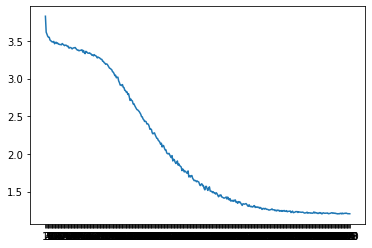

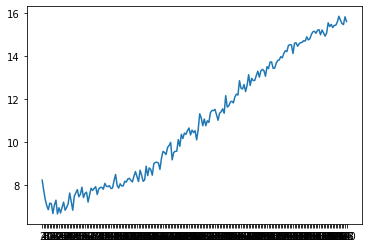

In [29]:
"""
SOLVER.EPOCH_CYCLE 400.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00005 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154'

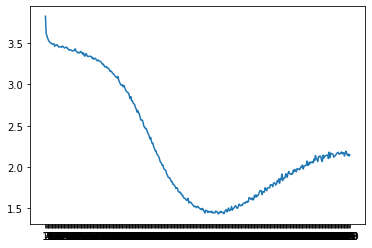

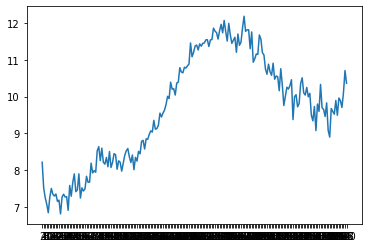

In [27]:
"""
SOLVER.EPOCH_CYCLE 200.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'] [3.827619215616813, 3.616453921183562, 3.590755058404727, 3.5656041502952576, 3.537858474713105, 3.5307745910607853, 3.5140392971344485, 3.502470071499164, 3.5160749760957866, 3.4890587773078527, 3.4899285244636045, 3.4890310909503546, 3.461162589299373, 3.469323096367029, 3.4743429712760143, 3.4666198698373942, 3.4642338072642302, 3.447258396026416, 3.4461765625537972, 3.4

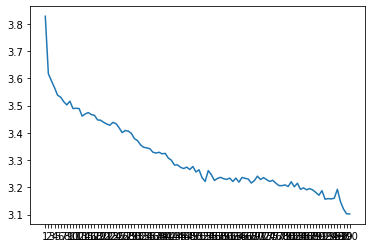

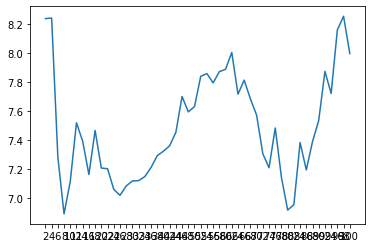

In [25]:
"""
#Next: cycle = 50 epochs and 100 epochs total
SOLVER.EPOCH_CYCLE 50.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100'] [3.827635366947223, 3.6165735041483855, 3.6002288239124494, 3.561615941616205, 3.5338340493348928, 3.5248355796703925, 3.506764285075359, 3.4997836687625985, 3.5007456854367867, 3.4939523683144498, 3.479482808174231, 3.4935092666210275, 3.4729671394213653, 3.4693996019852467, 3.4797353140818768, 3.4710296308382964, 3.4743913870591383, 3.459368865459393, 3.457283765077591, 3

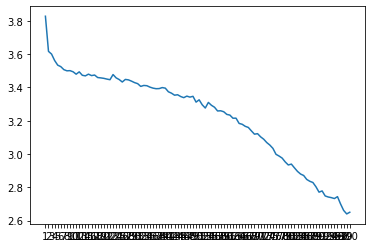

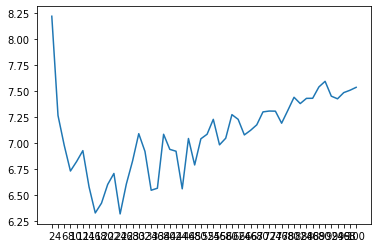

In [23]:
"""
SOLVER.EPOCH_CYCLE 100.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'] [3.827625782061846, 3.6165046149339433, 3.589960685143104, 3.562600945815062, 3.54844845029024, 3.5246360110930905, 3.504854527039406, 3.5322519410879183, 3.506646303794323, 3.485641195988044, 3.487922135836039, 3.504128154271688, 3.475377137844379, 3.4700776705375085, 3.508865801951824, 3.4727020210180526, 3.477060314936516, 3.457497538664402, 3.457557357274569, 3.4501736080035186, 3.449045200378467, 3.445043158072692, 3.4605734738019795, 3.4580216980897465, 3.444120332216605, 3.4349393867529354, 3.446371880861429, 3.4426787472688236, 3.4374898106623917, 3.428022558108354, 3.424004621994801, 3.408125789501728

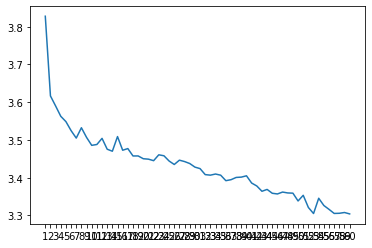

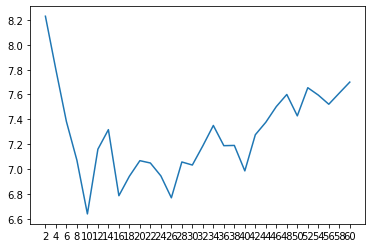

In [21]:
"""
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.00001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62'] [3.839234404839002, 3.6317218091243353, 3.6018129999821005, 3.5770941988015785, 3.571479672804857, 3.5703281454550915, 3.5687301647968783, 3.579706512964689, 3.560807180710328, 3.5588360589284163, 3.544955068673843, 3.5547740169060535, 3.52612458054836, 3.5258031357557345, 3.5288484730781655, 3.50769292926177, 3.5116276985559707, 3.5004373567226605, 3.5026834920430794, 3.4958078937652783, 3.4906634428562264, 3.487869922167216, 3.501250838622069, 3.497106853968058, 3.48682586199198, 3.4818476331539645, 3.487626090263709, 3.479348978935144, 3.485191638653095, 3.4736905992031097, 3.4738616821093435, 3

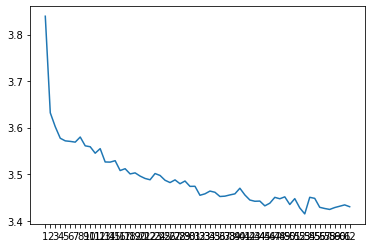

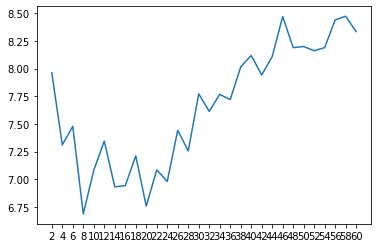

In [19]:
"""
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

Data:
Train epoch , train loss
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66'] [3.8928245099691243, 3.6924752539549117, 3.6743201445310545, 3.657910045904991, 3.6631194131496625, 3.6533400309391513, 3.6511117082375746, 3.6496631717070556, 3.7322734120564585, 3.6443357987281604, 3.6409814052092724, 3.6474804320396523, 3.6243653083458924, 3.631440736544438, 3.6264103651046753, 3.6131056401974115, 3.6191963645128102, 3.6075352346285796, 3.6066693312082534, 3.58432370195022, 3.5869873953171267, 3.580638361282838, 3.5926003547815175, 3.581149698832096, 3.5724358642712617, 3.5827586948871613, 3.5730741650630264, 3.570918539395699, 3.575324297715456, 3.564173

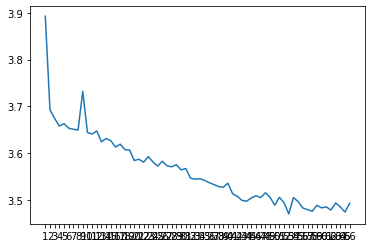

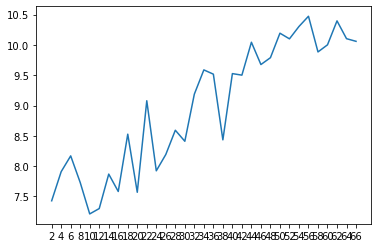

In [16]:
"""
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

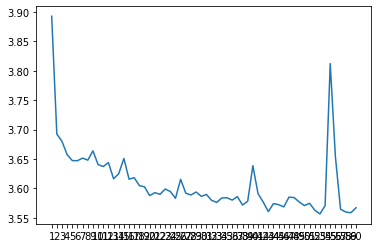

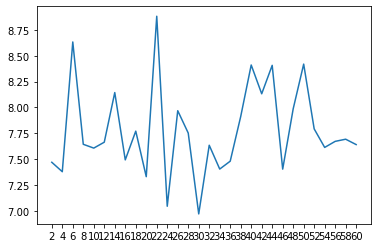

In [13]:
"""
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

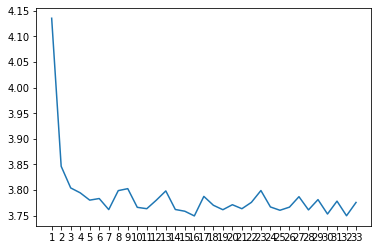

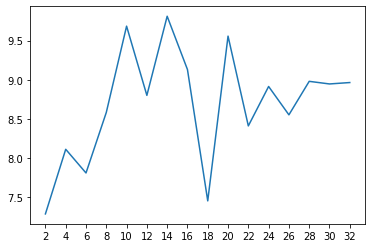

In [ ]:
"""
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.00099 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
WORD_EMB.TRAINABLE True
SOLVER.MAX_EPOCH 400
SOLVER.OPTIMIZING_METHOD adam 
GRU hidden 256
Bidirectional 
2 layer
Linear pred head
Dropout = 0.0 (linear) , GRU dropout = 0.5
Separated batch
Batch = 32
MLP receives forward and backward h_n
MC loss x4
"""
plot_stats('train_stats.txt')

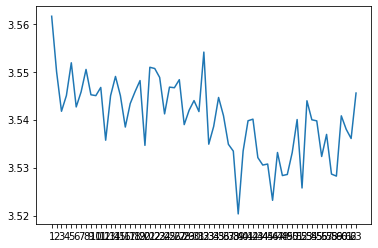

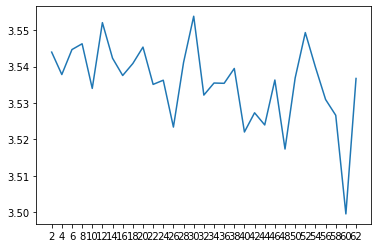

In [ ]:
"""
SOLVER.EPOCH_CYCLE 60.0 \
SOLVER.BASE_LR 0.005 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.018 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 400
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 32
Only desc
SOLVER.OPTIMIZING_METHOD adam \
"""
plot_stats('train_stats.txt')

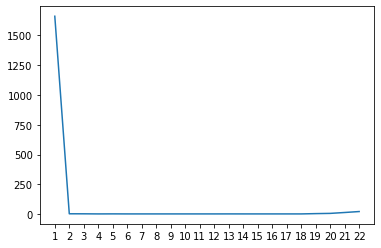

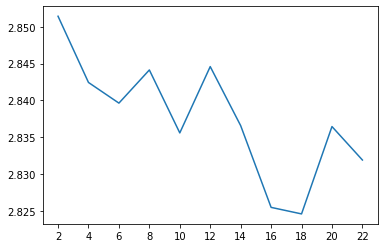

In [ ]:
"""
SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.5 , GRU dropout = 0.0
Separated batch
Batch = 16
Only desc
SOLVER.OPTIMIZING_METHOD adam \
"""
plot_stats('train_stats.txt')

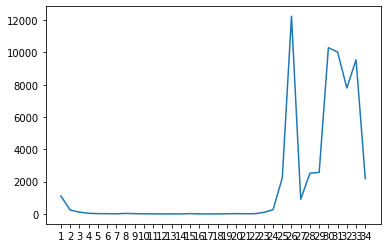

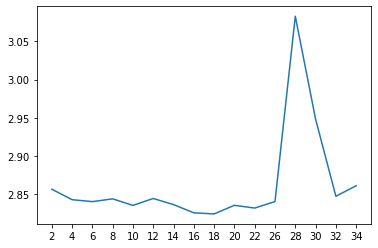

In [ ]:
"""
SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 16
Only desc
SOLVER.OPTIMIZING_METHOD adam \
"""
plot_stats('train_stats.txt')

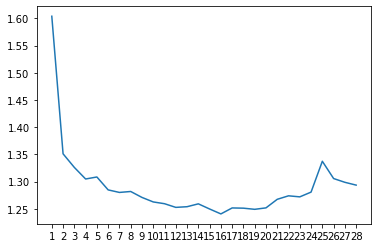

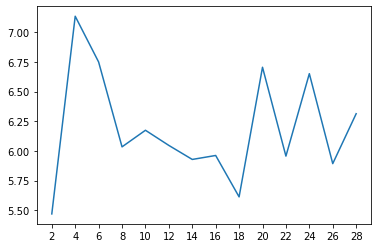

In [ ]:
"""
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0001 \
SOLVER.WEIGHT_DECAY 0.0001 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 16
Only desc
SOLVER.OPTIMIZING_METHOD adam \
"""
plot_stats('train_stats.txt')

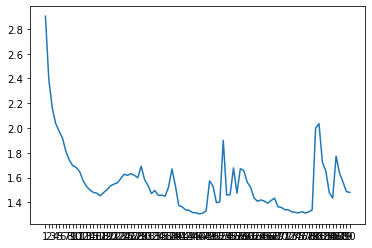

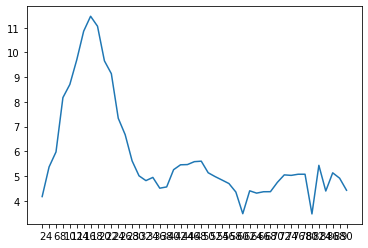

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 16
Only desc
"""
plot_stats('train_stats.txt')

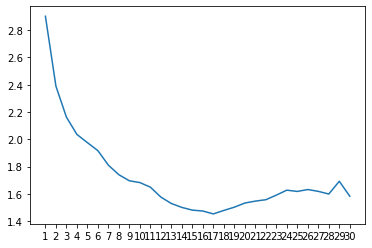

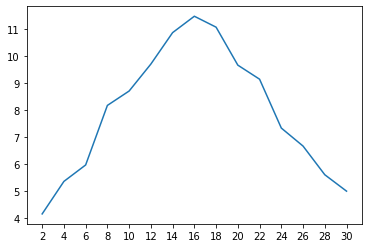

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 16
Only desc
"""
plot_stats('train_stats.txt')

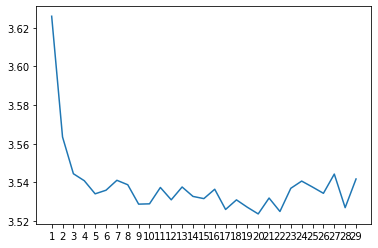

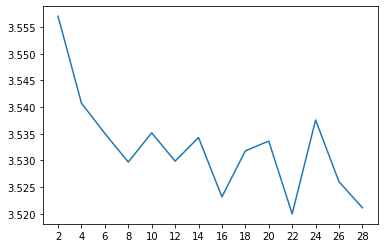

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
Batch = 16
"""
plot_stats('train_stats.txt')

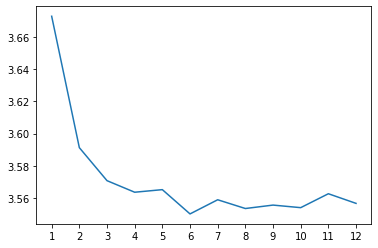

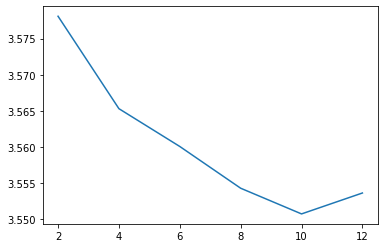

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.025 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.7 , GRU dropout = 0.0
Separated batch
"""
plot_stats('train_stats.txt')

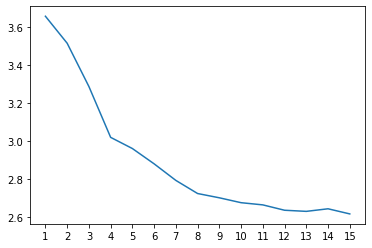

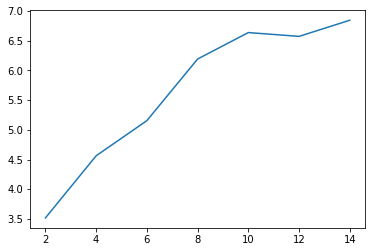

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.022 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
"""
plot_stats('train_stats.txt')

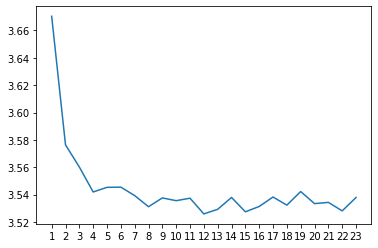

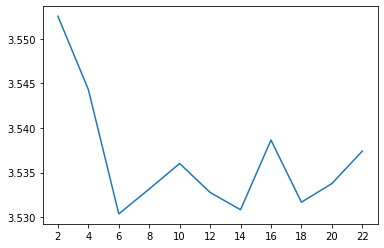

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.04 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
"""
plot_stats('train_stats.txt')

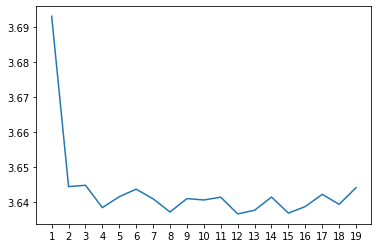

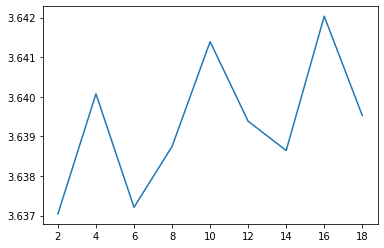

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.1 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 512
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
"""
#Underfitting
plot_stats('train_stats.txt')

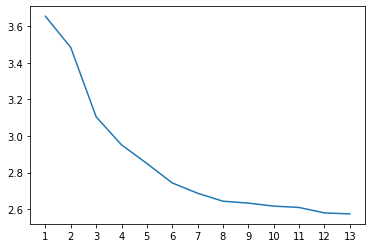

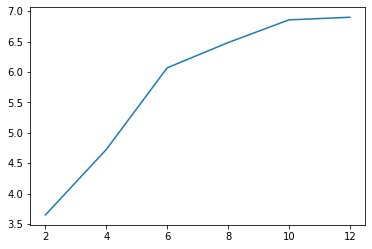

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 1024
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
"""
plot_stats('train_stats.txt')

In [ ]:
#Down here only val err tracking

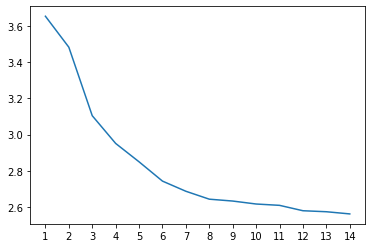

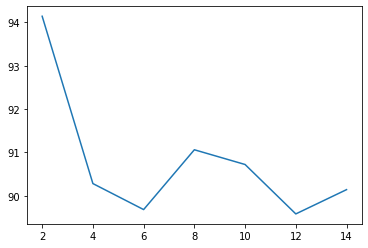

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.02 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
GRU hidden 1024
Bidirectional 
2 layer
MLP hid dim 2048 2048
Dropout = 0.5 + in GRU as well
"""
plot_stats('train_stats.txt')

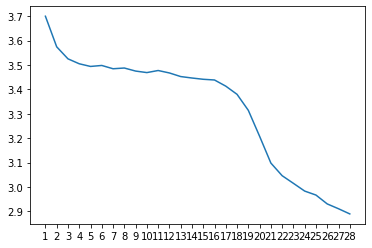

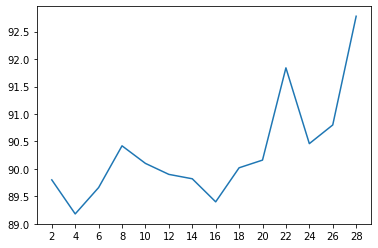

In [ ]:
"""
SOLVER.BASE_LR 0.005 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.7 + in LSTM as well
"""
plot_stats('train_stats.txt')

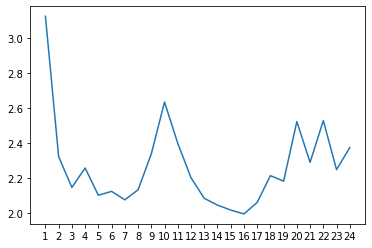

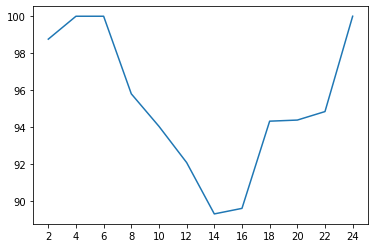

In [ ]:
"""
SOLVER.BASE_LR 0.1 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')
"""
Loss in training decreases with lot's of bumps until 16 epoch, it increases after
Val accuracy decreases until 14 epoch, and then increases rapidly
At eppch 15 the lr starts to increase
"""

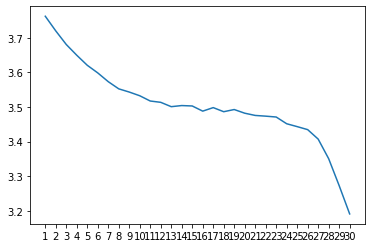

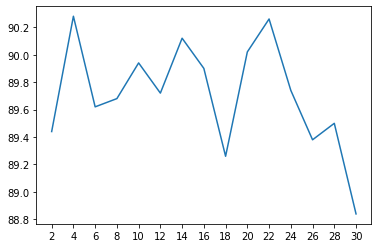

In [ ]:
"""
SOLVER.BASE_LR 0.001 \
SOLVER.COSINE_END_LR 0.0005 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

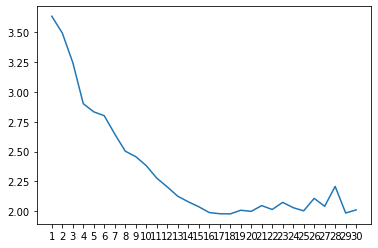

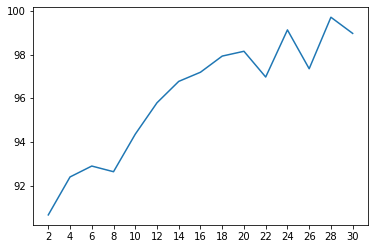

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.01 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')
"""
Train and val are pretty much inverted
Train loss decreases
Val error increases
"""

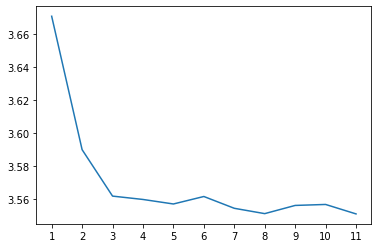

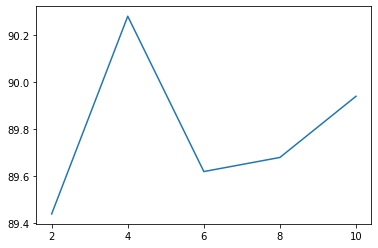

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.05 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

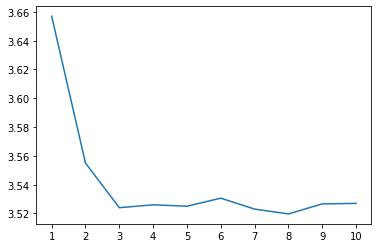

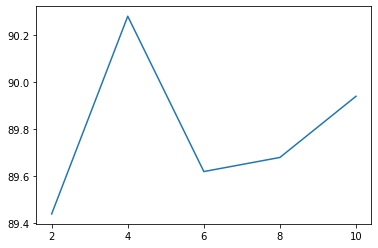

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.03 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

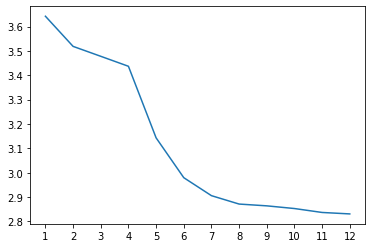

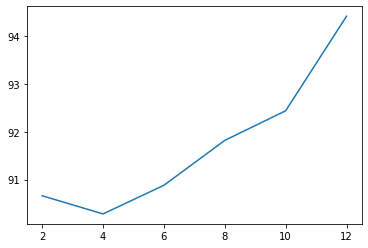

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.015 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

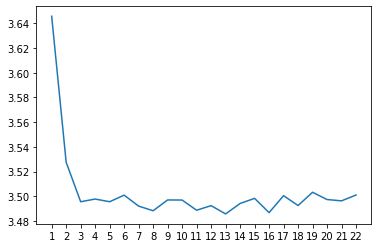

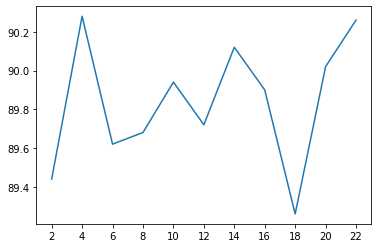

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.018 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

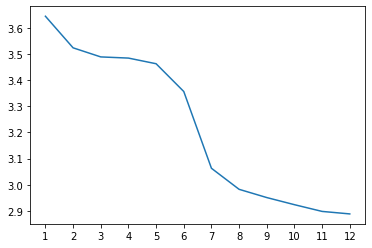

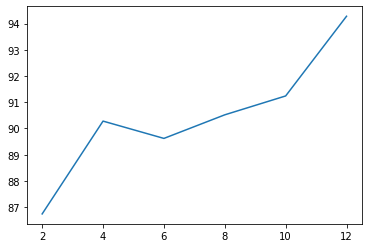

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0165 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

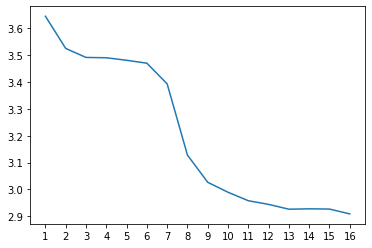

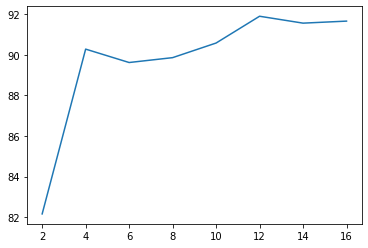

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

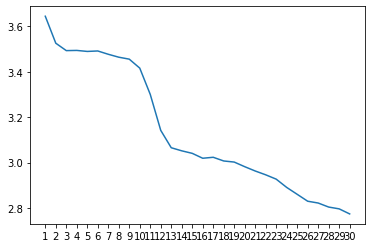

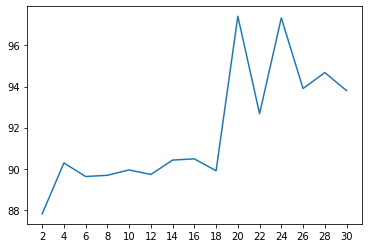

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.0175 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

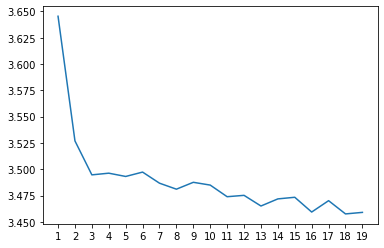

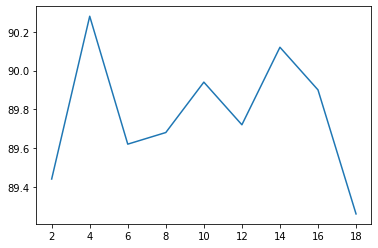

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.01775 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.3
"""
plot_stats('train_stats.txt')

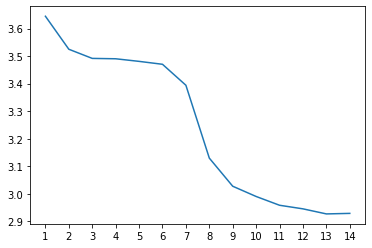

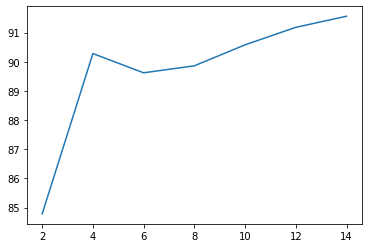

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.5
"""
plot_stats('train_stats.txt')

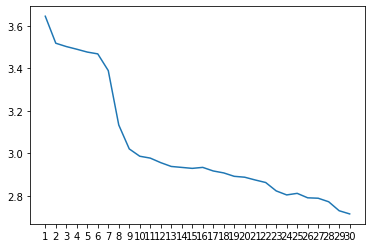

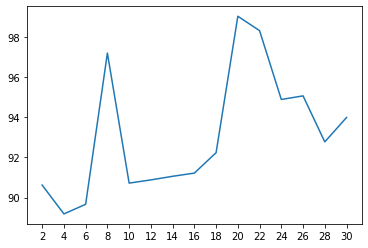

In [ ]:
"""
SOLVER.BASE_LR 0.01 \
SOLVER.COSINE_END_LR 0.001 \
SOLVER.WEIGHT_DECAY 0.017 \
WORD_EMB.GLOVE_PATH '/content/glove.6B/glove.6B.300d.txt' \
WORD_EMB.EMB_DIM 300 \
SOLVER.MAX_EPOCH 30
LSTM hidden 1024
Bidirectional 
2 layer
MLP hid dim 4096
Dropout = 0.7 + in LSTM as well
"""
plot_stats('train_stats.txt')

In [ ]:
#10 epochs and Linear pred head
WORD_EMB.USE_PRETRAINED_EMB True \
  WORD_EMB.TRAINABLE True \
{"RAM": "2.31/12.72G", "_type": "val_epoch", "epoch": "10/10", "gpu_mem": "0.11G", "mc_opt_err": 58.56000, "mc_q_err": 98.06000, "min_mc_opt_err": 58.56000, "min_mc_q_err": 96.48000, "min_top1_err": 89.22000, "min_top5_err": 53.56000, "time_diff": 0.13295, "top1_err": 89.96000, "top5_err": 55.22000}

WORD_EMB.USE_PRETRAINED_EMB False \
  WORD_EMB.TRAINABLE True \
{"RAM": "2.33/12.72G", "_type": "val_epoch", "epoch": "10/10", "gpu_mem": "0.11G", "mc_opt_err": 58.55500, "mc_q_err": 98.06000, "min_mc_opt_err": 58.55500, "min_mc_q_err": 96.48000, "min_top1_err": 89.22000, "min_top5_err": 53.56000, "time_diff": 0.13458, "top1_err": 89.96000, "top5_err": 55.22000}

LSTM hidden state = 100
{"RAM": "2.31/12.72G", "_type": "val_epoch", "epoch": "10/10", "gpu_mem": "0.02G", "mc_opt_err": 58.13500, "mc_q_err": 96.40000, "min_mc_opt_err": 58.13500, "min_mc_q_err": 96.12000, "min_top1_err": 89.70000, "min_top5_err": 53.88000, "time_diff": 0.14238, "top1_err": 90.18000, "top5_err": 54.18000}

LSTM hidden state = 100
WORD_EMB.USE_PRETRAINED_EMB False
{"RAM": "2.30/12.72G", "_type": "val_epoch", "epoch": "10/10", "gpu_mem": "0.02G", "mc_opt_err": 58.14500, "mc_q_err": 96.40000, "min_mc_opt_err": 58.14500, "min_mc_q_err": 95.70000, "min_top1_err": 89.70000, "min_top5_err": 53.88000, "time_diff": 0.13037, "top1_err": 90.18000, "top5_err": 54.18000}


In [ ]:
"""
  SOLVER.EPOCH_CYCLE 20.0 \
  SOLVER.BASE_LR 0.001 \
  SOLVER.LR_POLICY cosine \
  SOLVER.COSINE_END_LR 0.0 \
  SOLVER.WEIGHT_DECAY 0.01 \
  SOLVER.OPTIMIZING_METHOD sgd \
  SOLVER.MAX_EPOCH 20
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "20/20", "gpu_mem": "0.65G", "mc_opt_err": 58.40000, "mc_q_err": 98.08000, "min_mc_opt_err": 57.93000, "min_mc_q_err": 96.36000, "min_top1_err": 89.16000, "min_top5_err": 52.98000, "time_diff": 0.15971, "top1_err": 89.56000, "top5_err": 54.38000
"""

"""
  WORD_EMB.EMB_DIM 300 \
  SOLVER.EPOCH_CYCLE 200.0 \
  SOLVER.BASE_LR 0.01 \
  SOLVER.LR_POLICY cosine \
  SOLVER.COSINE_END_LR 0.0 \
  SOLVER.WEIGHT_DECAY 0.01 \
  SOLVER.OPTIMIZING_METHOD rmsprop \
  SOLVER.MAX_EPOCH 200
{"RAM": "2.38/12.72G", "_type": "val_epoch", "epoch": "20/200", "gpu_mem": "0.73G", "mc_opt_err": 58.42500, "mc_q_err": 98.18000, "min_mc_opt_err": 53.26500, "min_mc_q_err": 96.30000, "min_top1_err": 89.94000, "min_top5_err": 53.90000, "time_diff": 0.15274, "top1_err": 90.96000, "top5_err": 56.50000}
"""

"""
  WORD_EMB.EMB_DIM 300 \
  SOLVER.EPOCH_CYCLE 200.0 \
  SOLVER.BASE_LR 0.001 \
  SOLVER.LR_POLICY cosine \
  SOLVER.COSINE_END_LR 0.0 \
  SOLVER.WEIGHT_DECAY 0.01 \
  SOLVER.OPTIMIZING_METHOD rmsprop \
  SOLVER.MAX_EPOCH 200
  {"RAM": "2.37/12.72G", "_type": "val_epoch", "epoch": "40/200", "gpu_mem": "0.73G", "mc_opt_err": 58.66500, "mc_q_err": 96.52000, "min_mc_opt_err": 57.71500, "min_mc_q_err": 95.94000, "min_top1_err": 87.16000, "min_top5_err": 45.66000, "time_diff": 0.15173, "top1_err": 90.20000, "top5_err": 56.16000}
"""

"""
  WORD_EMB.EMB_DIM 300 \
  SOLVER.EPOCH_CYCLE 200.0 \
  SOLVER.BASE_LR 0.0001 \
  SOLVER.LR_POLICY cosine \
  SOLVER.COSINE_END_LR 0.0 \
  SOLVER.WEIGHT_DECAY 0.01 \
  SOLVER.OPTIMIZING_METHOD rmsprop \
  SOLVER.MAX_EPOCH 200
  {"RAM": "2.40/12.72G", "_type": "val_epoch", "epoch": "20/200", "gpu_mem": "0.73G", "mc_opt_err": 57.85500, "mc_q_err": 96.00000, "min_mc_opt_err": 56.42500, "min_mc_q_err": 96.00000, "min_top1_err": 90.04000, "min_top5_err": 66.28000, "time_diff": 0.15323, "top1_err": 93.70000, "top5_err": 77.60000}
"""